# **Enquête : les étudiants et la ville**

Il y a une partie des données issues de l'enquête "Les étudiants et la ville" effectuée en 2001 par des étudiants de sociologie à l'Université de Tours. Cet exemple est décrit dans : Crucianu M., Asselin de Beauville J-P., Boné
R., Méthodes factorielles pour l'analyse des données, Hermès-Lavoisier 2004.

**L'analyse porte sur cinq questions en rapport avec le logement étudiant. L'ensemble des individus statistiques est ici un échantillon de 383 étudiants.**


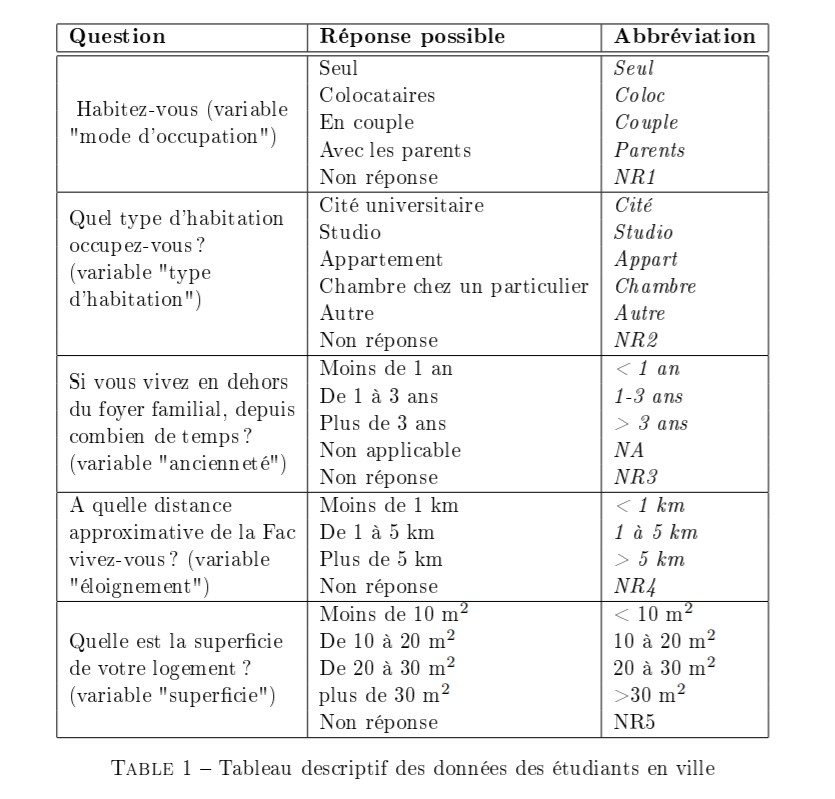

Ce que on va faire maintenant:
* **Réaliser une analyse des correspondances multiples.**

* **Produire les statistiques et les graphiques nécéssaires à l'analyse.**

* **Utiliser les graphiques et les statistiques de la fonction MCA pour interpréter les résultats.**

L'analyse va réponde aux questions relatives aux associations/ressemblances entre les différents individus, variables et modalités ainsi que de souligner les potentielles tendances.

**La base de donnée à utiliser est sur le dossier data : ex_acm.txt**

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("ex_acm.txt", header=0, index_col=0)
df

,Mode,Type,Ancien,Eloign,Superf
1,NR1,Autre,NR3,plus_5km_NR,plus_30m
2,NR1,Autre,NR3,de_1_5km,NR5
3,NR1,Autre,NR3,plus_5km_NR,NR5
4,NR1,Autre,NR3,plus_5km_NR,NR5
5,NR1,Autre,NR3,plus_5km_NR,NR5
...,...,...,...,...,...
379,Seul,Appart,NR3,plus_5km_NR,de_10_20m
380,Couple,Autre,de_1_3ans,de_1_5km,plus_30m
381,Seul,NR2,plus_3ans,plus_5km_NR,moins_10m
382,Coloc,NR2,moins_1an,de_1_5km,plus_30m


In [3]:
# Un bref résumé des données
df.describe()

,Mode,Type,Ancien,Eloign,Superf
count,383,383,383,383,383
unique,4,6,4,3,5
top,Seul,Appart,plus_3ans,de_1_5km,plus_30m
freq,185,116,110,191,150


In [4]:
#打印出每个变量的模态取值
for key in df.keys():
    print(key,df[key].unique())

Mode ['NR1' 'Seul' 'Coloc' 'Couple']
Type ['Autre' 'NR2' 'Studio' 'Cite' 'Chamb' 'Appart']
Ancien ['NR3' 'moins_1an' 'de_1_3ans' 'plus_3ans']
Eloign ['plus_5km_NR' 'de_1_5km' 'moins_1km']
Superf ['plus_30m' 'NR5' 'de_10_20m' 'moins_10m' 'de_20_30m']


In [5]:
# On convertit les données en format matriciel (numpy array)转化为多维数组形式
X = df.to_numpy()
print(X)

[['NR1' 'Autre' 'NR3' 'plus_5km_NR' 'plus_30m']
 ['NR1' 'Autre' 'NR3' 'de_1_5km' 'NR5']
 ['NR1' 'Autre' 'NR3' 'plus_5km_NR' 'NR5']
 ...
 ['Seul' 'NR2' 'plus_3ans' 'plus_5km_NR' 'moins_10m']
 ['Coloc' 'NR2' 'moins_1an' 'de_1_5km' 'plus_30m']
 ['NR1' 'Autre' 'de_1_3ans' 'plus_5km_NR' 'NR5']]


In [6]:
ACM = MCA(row_labels=df.index.values, var_labels=df.columns.values)
ACM

MCA(row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383]),
    var_labels=array(['Mode', 'Type', 'Ancien', 'Eloign', 'Superf'], dtype=object))

In [7]:
ACM.fit(X)

MCA(row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383]),
    var_labels=array(['Mode', 'Type', 'Ancien', 'Eloign', 'Superf'], dtype=object))

In [8]:
# Affichage des valeurs propres 显示特征值
valeurs_propres=ACM.eig_[0]
print("Les valeurs propres sont : ", valeurs_propres)
valeurs_propres.sum()

Les valeurs propres sont :  [0.72152789 0.40328861 0.32884429 0.25190452 0.23609437 0.2104957
 0.19849951 0.18648254 0.17080041 0.16676493 0.12398298 0.11042419
 0.10424943 0.07469172 0.05531922 0.03845138 0.01817831]


np.float64(3.4000000000000004)

In [9]:
# Pourcentage de l'inertie exprimée par chaque axe 每个特征值的百分比
print("Le poucentage d'inertie expérimée par chaque axe : ", ACM.eig_[1])

Le poucentage d'inertie expérimée par chaque axe :  [21.22140855 11.86142957  9.67189078  7.40895658  6.94395204  6.19104988
  5.83822102  5.48478067  5.02354146  4.90485078  3.64655834  3.2477702
  3.06615976  2.19681516  1.62703586  1.130923    0.53465632]


In [10]:
# Pourcentage cumulé de l'inertie totale 累计百分比
print("Les poucentages d'inertie cumulée : ", ACM.eig_[2])

Les poucentages d'inertie cumulée :  [ 21.22140855  33.08283813  42.75472891  50.16368549  57.10763754
  63.29868742  69.13690844  74.62168912  79.64523057  84.55008135
  88.1966397   91.44440989  94.51056965  96.70738482  98.33442068
  99.46534368 100.        ]


*   $K$ nombre de modalités
*   $p$ nombre de variables

In [11]:
# Le nombre maximal de dimensions
print("k=",sum(df.nunique()) )
print("p=",df.shape[1])
print("Le nombre maximal de dimensions est : K - p = ", sum(df.nunique()) - df.shape[1])

k= 22
p= 5
Le nombre maximal de dimensions est : K - p =  17


In [12]:
# L'inertie totale 总惯性
print("L'inertie total est : K/p - 1 = ", sum(df.nunique())/df.shape[1]-1)

L'inertie total est : K/p - 1 =  3.4000000000000004


In [13]:
# Vérification avec les résultats obtenus 验证是否一致
print("L'inertie totale obtenue = ",valeurs_propres.sum())

L'inertie totale obtenue =  3.4000000000000004


* equal

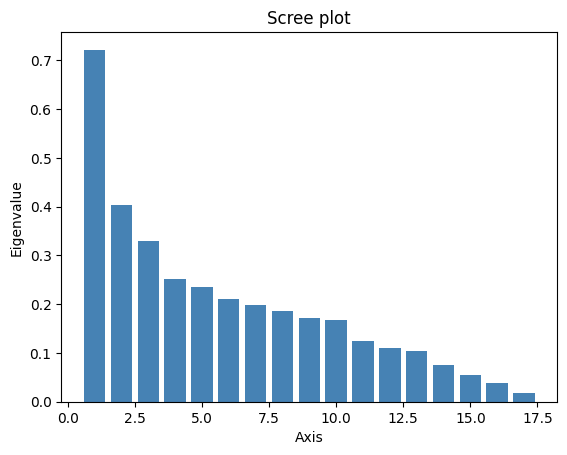

In [14]:
ACM.plot_eigenvalues() #画出特征值的柱状图

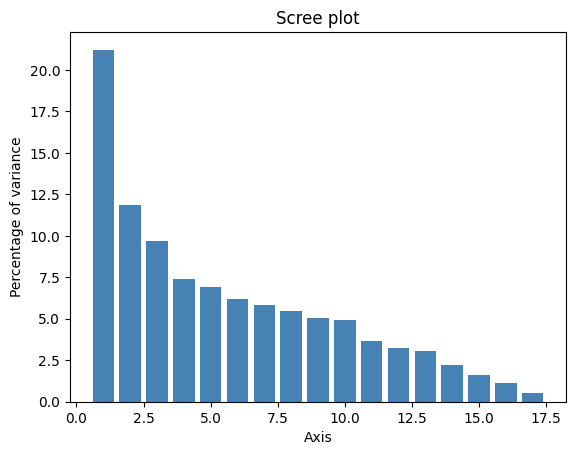

In [15]:
ACM.plot_eigenvalues(type="percentage")

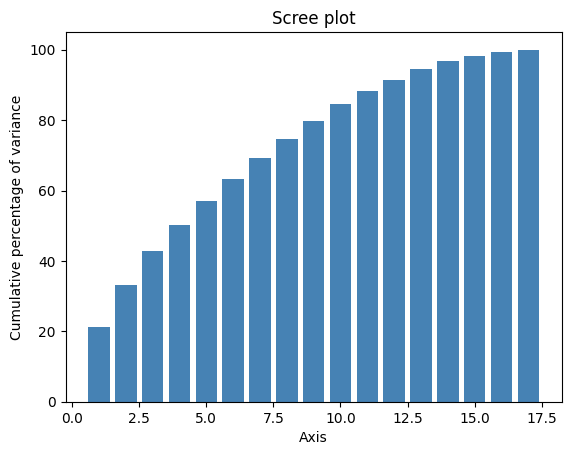

In [16]:
ACM.plot_eigenvalues(type="cumulative")

In [17]:
print("La moyenne des valeurs propres : ", np.average(valeurs_propres))
print("La moyenne des valeurs propres est aussi égale à 1/p : ", 1/df.shape[1])
print("On peut retenir les dimensions qui possèdent une valeur propre supérieure à la moyenne des valeurs propres. On retient donc", sum(valeurs_propres > 1/df.shape[1]), "dimensions.")

La moyenne des valeurs propres :  0.2
La moyenne des valeurs propres est aussi égale à 1/p :  0.2
On peut retenir les dimensions qui possèdent une valeur propre supérieure à la moyenne des valeurs propres. On retient donc 6 dimensions.


In [18]:
print(valeurs_propres)

[0.72152789 0.40328861 0.32884429 0.25190452 0.23609437 0.2104957
 0.19849951 0.18648254 0.17080041 0.16676493 0.12398298 0.11042419
 0.10424943 0.07469172 0.05531922 0.03845138 0.01817831]


Nous gardons les six premiers valeurs propres

In [19]:
vp_retenues = np.array([vp for vp in valeurs_propres if vp >1/df.shape[1]])
print(vp_retenues)

[0.72152789 0.40328861 0.32884429 0.25190452 0.23609437 0.2104957 ]


In [20]:
# On calcule les valeurs propres/taux d’inertie corrigés
vp_corrigés = ((df.shape[1]/(df.shape[1]-1)) * (vp_retenues-1/df.shape[1]))**2
print(vp_corrigés)
print(np.average(vp_corrigés))

[4.24986470e-01 6.45722768e-02 2.59388284e-02 4.20949937e-03
 2.03563048e-03 1.72124430e-04]
0.08698580494273046


In [21]:
# On garde les dimentions pour lesquelles les valeurs propres corrigées sont supérieures à leurs moyenne
print("On devrait retenir donc", sum(vp_corrigés > np.mean(vp_corrigés)), "dimension.")

On devrait retenir donc 1 dimension.


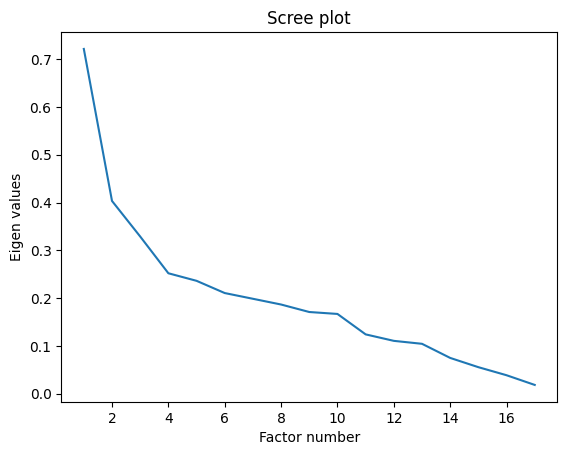

In [22]:
# Scree plot : éboulis des valeurs propres 绘制碎石图
plt.plot(np.arange(1,len(valeurs_propres)+1),valeurs_propres)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

#### **On retient 4 dimensions pour la suite de l'étude**

In [23]:
# On refait l'ACM avec les 4 dimensions retenues
ACM4 = MCA(row_labels=df.index.values, var_labels=df.columns.values,n_components=4)
# Calcul
ACM4.fit(X)

MCA(n_components=4,
    row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 1...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383]),
    var_labels=array(['Mode', 'Type', 'Ancien', 'Eloign', 'Superf'], dtype=object))

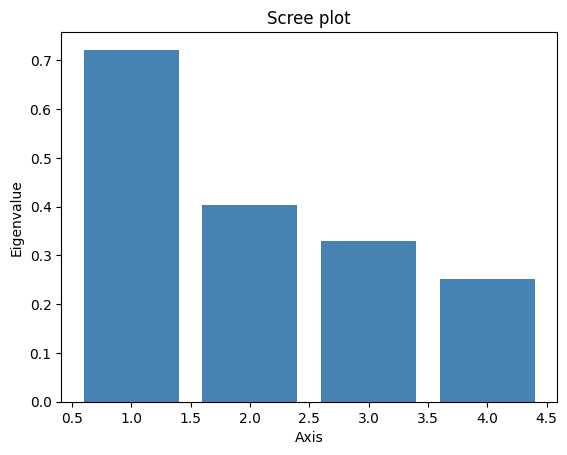

array([0.72152789, 0.40328861, 0.32884429, 0.25190452])

In [24]:
# Représentation des valeurs propres
ACM4.plot_eigenvalues()
ACM4.eig_[0]

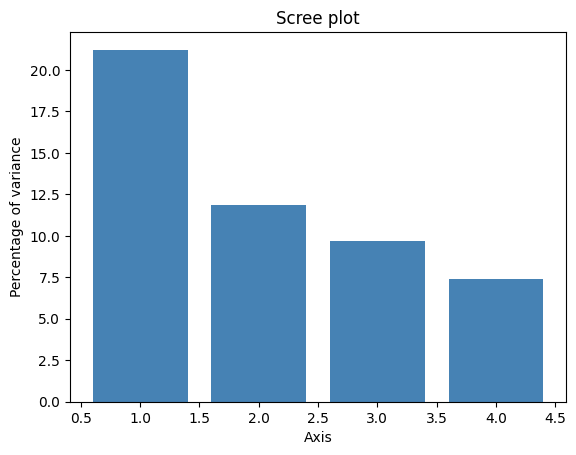

In [25]:
ACM4.plot_eigenvalues(type="percentage")

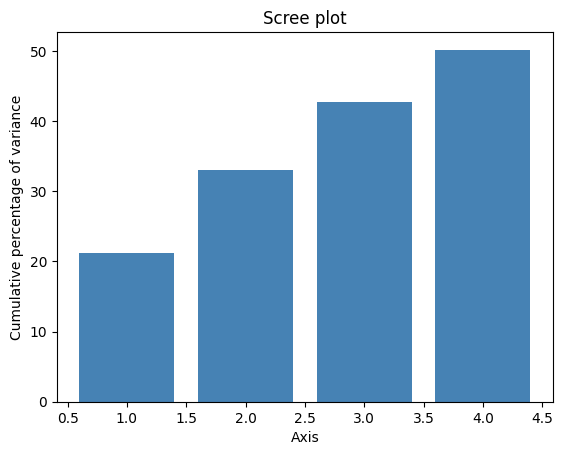

In [26]:
ACM4.plot_eigenvalues(type="cumulative")

In [27]:
# Exportation de la totalité des données lignes vers un DataFrame
df_rows = ACM4.row_topandas()
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_contrib_dim4,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4
1,-1.493799,0.007911,-0.049346,0.163453,0.807482,0.000041,0.001933,0.027692,0.752038,0.000021,0.000821,0.009004
2,-1.529649,-0.425435,0.178491,0.091262,0.846705,0.117180,0.025295,0.008633,0.559037,0.043244,0.007612,0.001990
3,-1.865093,-0.500662,0.280889,0.324673,1.258778,0.162284,0.062644,0.109259,0.748871,0.053963,0.016985,0.022693
4,-1.865093,-0.500662,0.280889,0.324673,1.258778,0.162284,0.062644,0.109259,0.748871,0.053963,0.016985,0.022693
5,-1.865093,-0.500662,0.280889,0.324673,1.258778,0.162284,0.062644,0.109259,0.748871,0.053963,0.016985,0.022693
...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.284472,-0.201026,0.217113,-0.317539,0.029284,0.026163,0.037427,0.104510,0.028463,0.014214,0.016579,0.035464
380,-0.257295,0.672886,-0.344194,0.015555,0.023956,0.293135,0.094063,0.000251,0.020320,0.138977,0.036363,0.000074
381,-0.042455,-0.796109,-0.406274,0.339250,0.000652,0.410327,0.131054,0.119291,0.000271,0.095429,0.024853,0.017329
382,-0.056545,0.140053,-0.404866,-1.253375,0.001157,0.012699,0.130147,1.628273,0.000552,0.003384,0.028279,0.271025


In [28]:
# Coordonnées des points lignes #坐标
np.set_printoptions(suppress=True)
print(np.round(ACM4.row_coord_,3))

[[-1.494  0.008 -0.049  0.163]
 [-1.53  -0.425  0.178  0.091]
 [-1.865 -0.501  0.281  0.325]
 ...
 [-0.042 -0.796 -0.406  0.339]
 [-0.057  0.14  -0.405 -1.253]
 [-1.391 -0.4    0.209  0.065]]


In [29]:
# Contributions des points lignes 贡献
print(np.round(ACM4.row_contrib_,3))

[[0.807 0.    0.002 0.028]
 [0.847 0.117 0.025 0.009]
 [1.259 0.162 0.063 0.109]
 ...
 [0.001 0.41  0.131 0.119]
 [0.001 0.013 0.13  1.628]
 [0.7   0.104 0.035 0.004]]


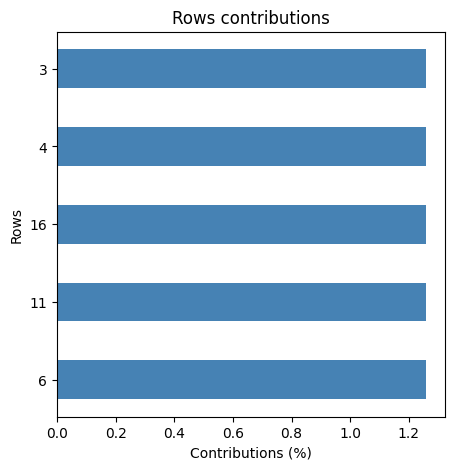

In [30]:
# Classement des points lignes en fonction de leurs contributions au 1er axe
ACM4.plot_row_contrib(num_axis=1,figsize=(5,5),nb_values=5)

In [31]:
# Qualités de représentation COS2 des points lignes 表示质量 
print(np.round(ACM4.row_cos2_,3))

[[0.752 0.    0.001 0.009]
 [0.559 0.043 0.008 0.002]
 [0.749 0.054 0.017 0.023]
 ...
 [0.    0.095 0.025 0.017]
 [0.001 0.003 0.028 0.271]
 [0.414 0.034 0.009 0.001]]


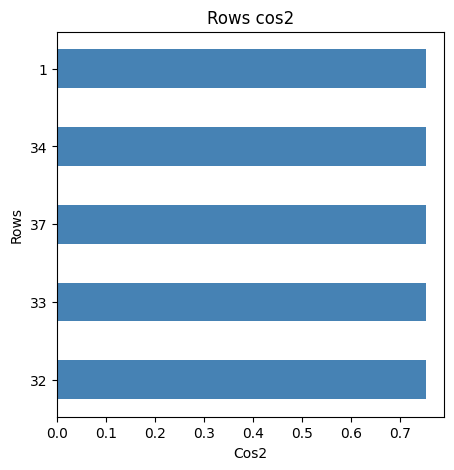

In [32]:
# Classement des points lignes en fonction de leurs COS2 sur le 1er axe
ACM4.plot_row_cos2(num_axis=1,figsize=(5,5), nb_values = 5)

In [33]:
# Exportation de la totalité des données colonnes vers un DataFrame pandas 列变量
df_cols = ACM4.col_topandas()
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4
Mode_Coloc,0.227522,1.020055,-0.786938,-1.169199,0.198563,7.140659,5.211917,15.019254,0.008314,0.167113,0.099459,0.219553
Mode_Couple,0.221854,1.315454,-0.244849,0.942000,0.178107,11.203065,0.476002,9.197433,0.007390,0.259823,0.009002,0.133238
Mode_NR1,-1.591385,-0.238838,0.099534,0.076013,17.412140,0.701692,0.149455,0.113787,0.835375,0.018816,0.003268,0.001906
Mode_Seul,0.692055,-0.525114,0.240510,0.041332,6.412559,6.605313,1.699339,0.065514,0.447495,0.257640,0.054047,0.001596
Type_Appart,0.239038,1.043298,-0.358106,-0.116644,0.479700,16.348962,2.362227,0.327173,0.024824,0.472894,0.055715,0.005911
Type_Autre,-1.584990,-0.132189,0.013677,0.234340,13.817988,0.171956,0.002257,0.865170,0.621911,0.004326,0.000046,0.013595
Type_Chamb,0.235812,-0.797643,-0.027961,-1.081486,0.080489,1.647639,0.002483,4.849168,0.003064,0.035054,0.000043,0.064441
Type_Cite,0.750465,-1.439496,-1.909820,0.673123,1.671180,11.000693,23.747045,3.850952,0.067518,0.248415,0.437263,0.054318
Type_NR2,-0.920720,-0.872471,0.394205,-1.107137,1.349759,2.168403,0.542886,5.590114,0.051662,0.046389,0.009470,0.074700
Type_Studio,0.717606,-0.155645,1.024909,0.130644,4.025070,0.338775,18.015042,0.382119,0.202238,0.009514,0.412536,0.006703


In [34]:
# Coordonnées des points colonnes 列变量在各主轴的坐标/得分
print(np.round(ACM4.col_coord_,3))

[[ 0.228  1.02  -0.787 -1.169]
 [ 0.222  1.315 -0.245  0.942]
 [-1.591 -0.239  0.1    0.076]
 [ 0.692 -0.525  0.241  0.041]
 [ 0.239  1.043 -0.358 -0.117]
 [-1.585 -0.132  0.014  0.234]
 [ 0.236 -0.798 -0.028 -1.081]
 [ 0.75  -1.439 -1.91   0.673]
 [-0.921 -0.872  0.394 -1.107]
 [ 0.718 -0.156  1.025  0.131]
 [-1.539 -0.258  0.082  0.045]
 [ 0.474  0.06  -0.125 -0.607]
 [ 0.657 -0.596 -0.138 -0.339]
 [ 0.484  0.611  0.135  0.731]
 [ 0.213  0.093 -0.179 -0.367]
 [ 0.652 -0.048  0.234  0.49 ]
 [-1.212 -0.145  0.114  0.219]
 [-1.994 -0.815  0.496  0.241]
 [ 0.612 -0.753  0.544 -0.985]
 [ 0.669  0.165  0.896  0.519]
 [ 0.776 -1.596 -2.049  0.967]
 [-0.417  0.799 -0.451 -0.164]]


In [35]:
# Contributions des points colonnes 列变量的贡献
print(np.round(ACM4.col_contrib_,3))

[[ 0.199  7.141  5.212 15.019]
 [ 0.178 11.203  0.476  9.197]
 [17.412  0.702  0.149  0.114]
 [ 6.413  6.605  1.699  0.066]
 [ 0.48  16.349  2.362  0.327]
 [13.818  0.172  0.002  0.865]
 [ 0.08   1.648  0.002  4.849]
 [ 1.671 11.001 23.747  3.851]
 [ 1.35   2.168  0.543  5.59 ]
 [ 4.025  0.339 18.015  0.382]
 [16.806  0.844  0.105  0.04 ]
 [ 1.547  0.045  0.236  7.252]
 [ 2.499  3.677  0.24   1.901]
 [ 1.864  5.317  0.318 12.17 ]
 [ 0.627  0.216  0.975  5.321]
 [ 3.171  0.03   0.893  5.135]
 [ 9.458  0.244  0.185  0.886]
 [10.07   3.013  1.365  0.42 ]
 [ 1.842  4.995  3.19  13.685]
 [ 3.076  0.335 12.105  5.304]
 [ 1.526 11.542 23.329  6.79 ]
 [ 1.887 12.414  4.851  0.835]]


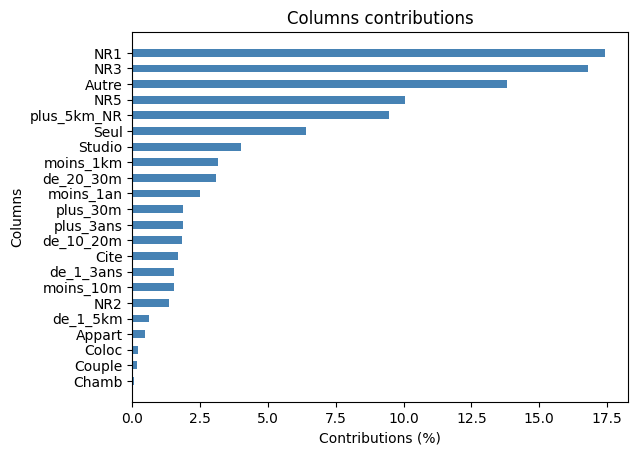

In [36]:
# Classement des points colonnes en fonction de leurs contributions au 1er axe 列变量在第一主轴上的贡献率
ACM4.plot_col_contrib(num_axis=1)

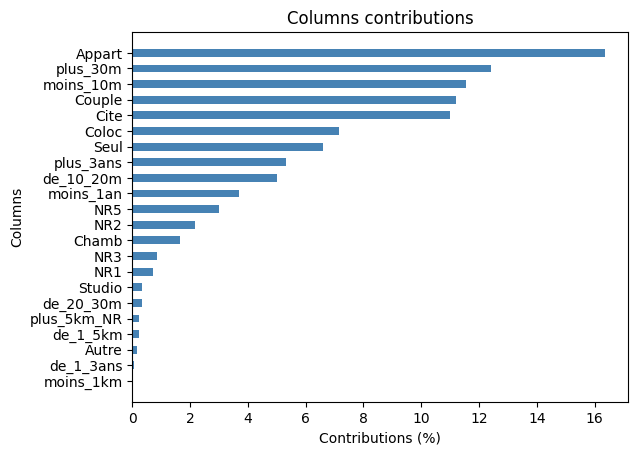

In [54]:
# Classement des points colonnes en fonction de leurs contributions au 1er axe 列变量在第一主轴上的贡献率
ACM4.plot_col_contrib(num_axis=2)

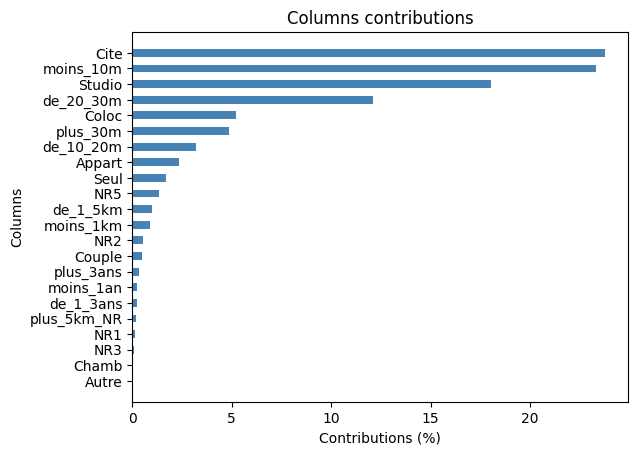

In [55]:
# Classement des points colonnes en fonction de leurs contributions au 1er axe 列变量在第一主轴上的贡献率
ACM4.plot_col_contrib(num_axis=3)

In [37]:
# Qualités de représentation COS2 des points colonnes 列变量的表示质量
print(np.round(ACM4.col_cos2_,3))

[[0.008 0.167 0.099 0.22 ]
 [0.007 0.26  0.009 0.133]
 [0.835 0.019 0.003 0.002]
 [0.447 0.258 0.054 0.002]
 [0.025 0.473 0.056 0.006]
 [0.622 0.004 0.    0.014]
 [0.003 0.035 0.    0.064]
 [0.068 0.248 0.437 0.054]
 [0.052 0.046 0.009 0.075]
 [0.202 0.01  0.413 0.007]
 [0.815 0.023 0.002 0.001]
 [0.074 0.001 0.005 0.121]
 [0.114 0.094 0.005 0.03 ]
 [0.094 0.15  0.007 0.215]
 [0.045 0.009 0.032 0.134]
 [0.157 0.001 0.02  0.088]
 [0.445 0.006 0.004 0.015]
 [0.4   0.067 0.025 0.006]
 [0.081 0.122 0.064 0.21 ]
 [0.148 0.009 0.265 0.089]
 [0.061 0.256 0.422 0.094]
 [0.112 0.411 0.131 0.017]]


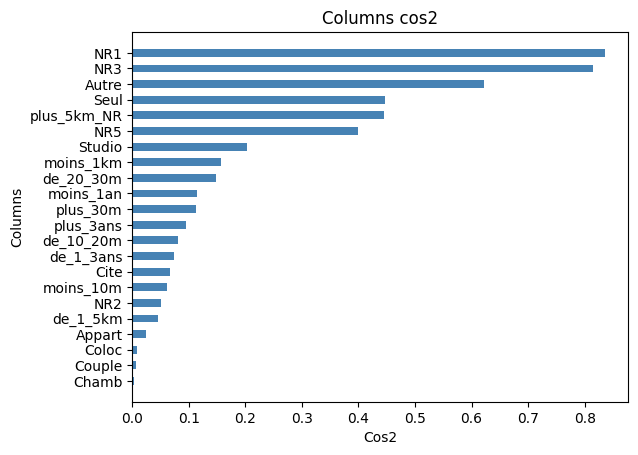

In [51]:
# Classement des points colonnes en fonction de leurs COS2 sur le 3er axe
ACM4.plot_col_cos2(num_axis=1)

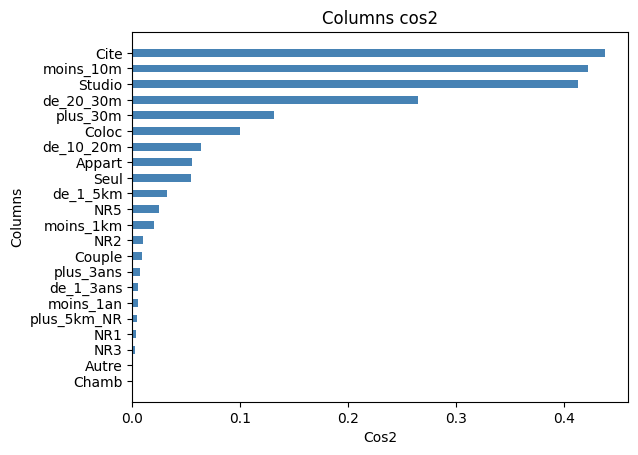

In [50]:
# Classement des points colonnes en fonction de leurs COS2 sur le 3er axe
ACM4.plot_col_cos2(num_axis=3)

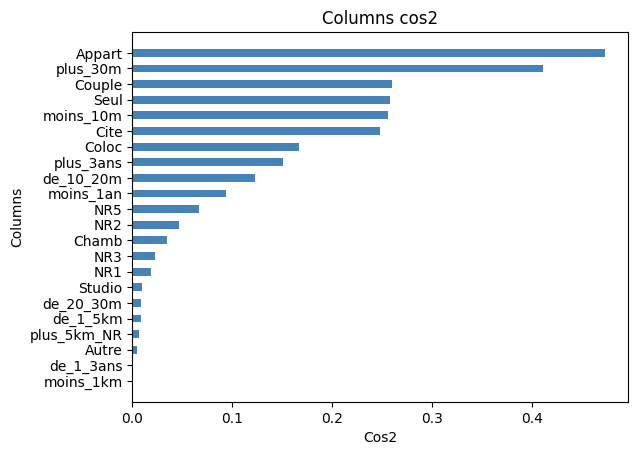

In [52]:
# Classement des points colonnes en fonction de leurs COS2 sur le 3er axe
ACM4.plot_col_cos2(num_axis=2)

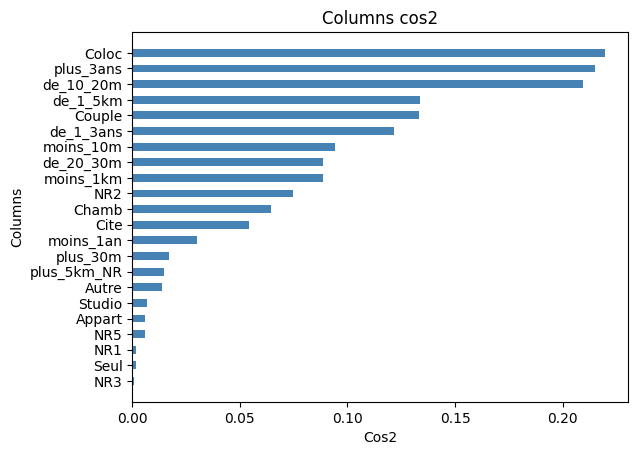

In [60]:
ACM4.plot_col_cos2(num_axis=4)

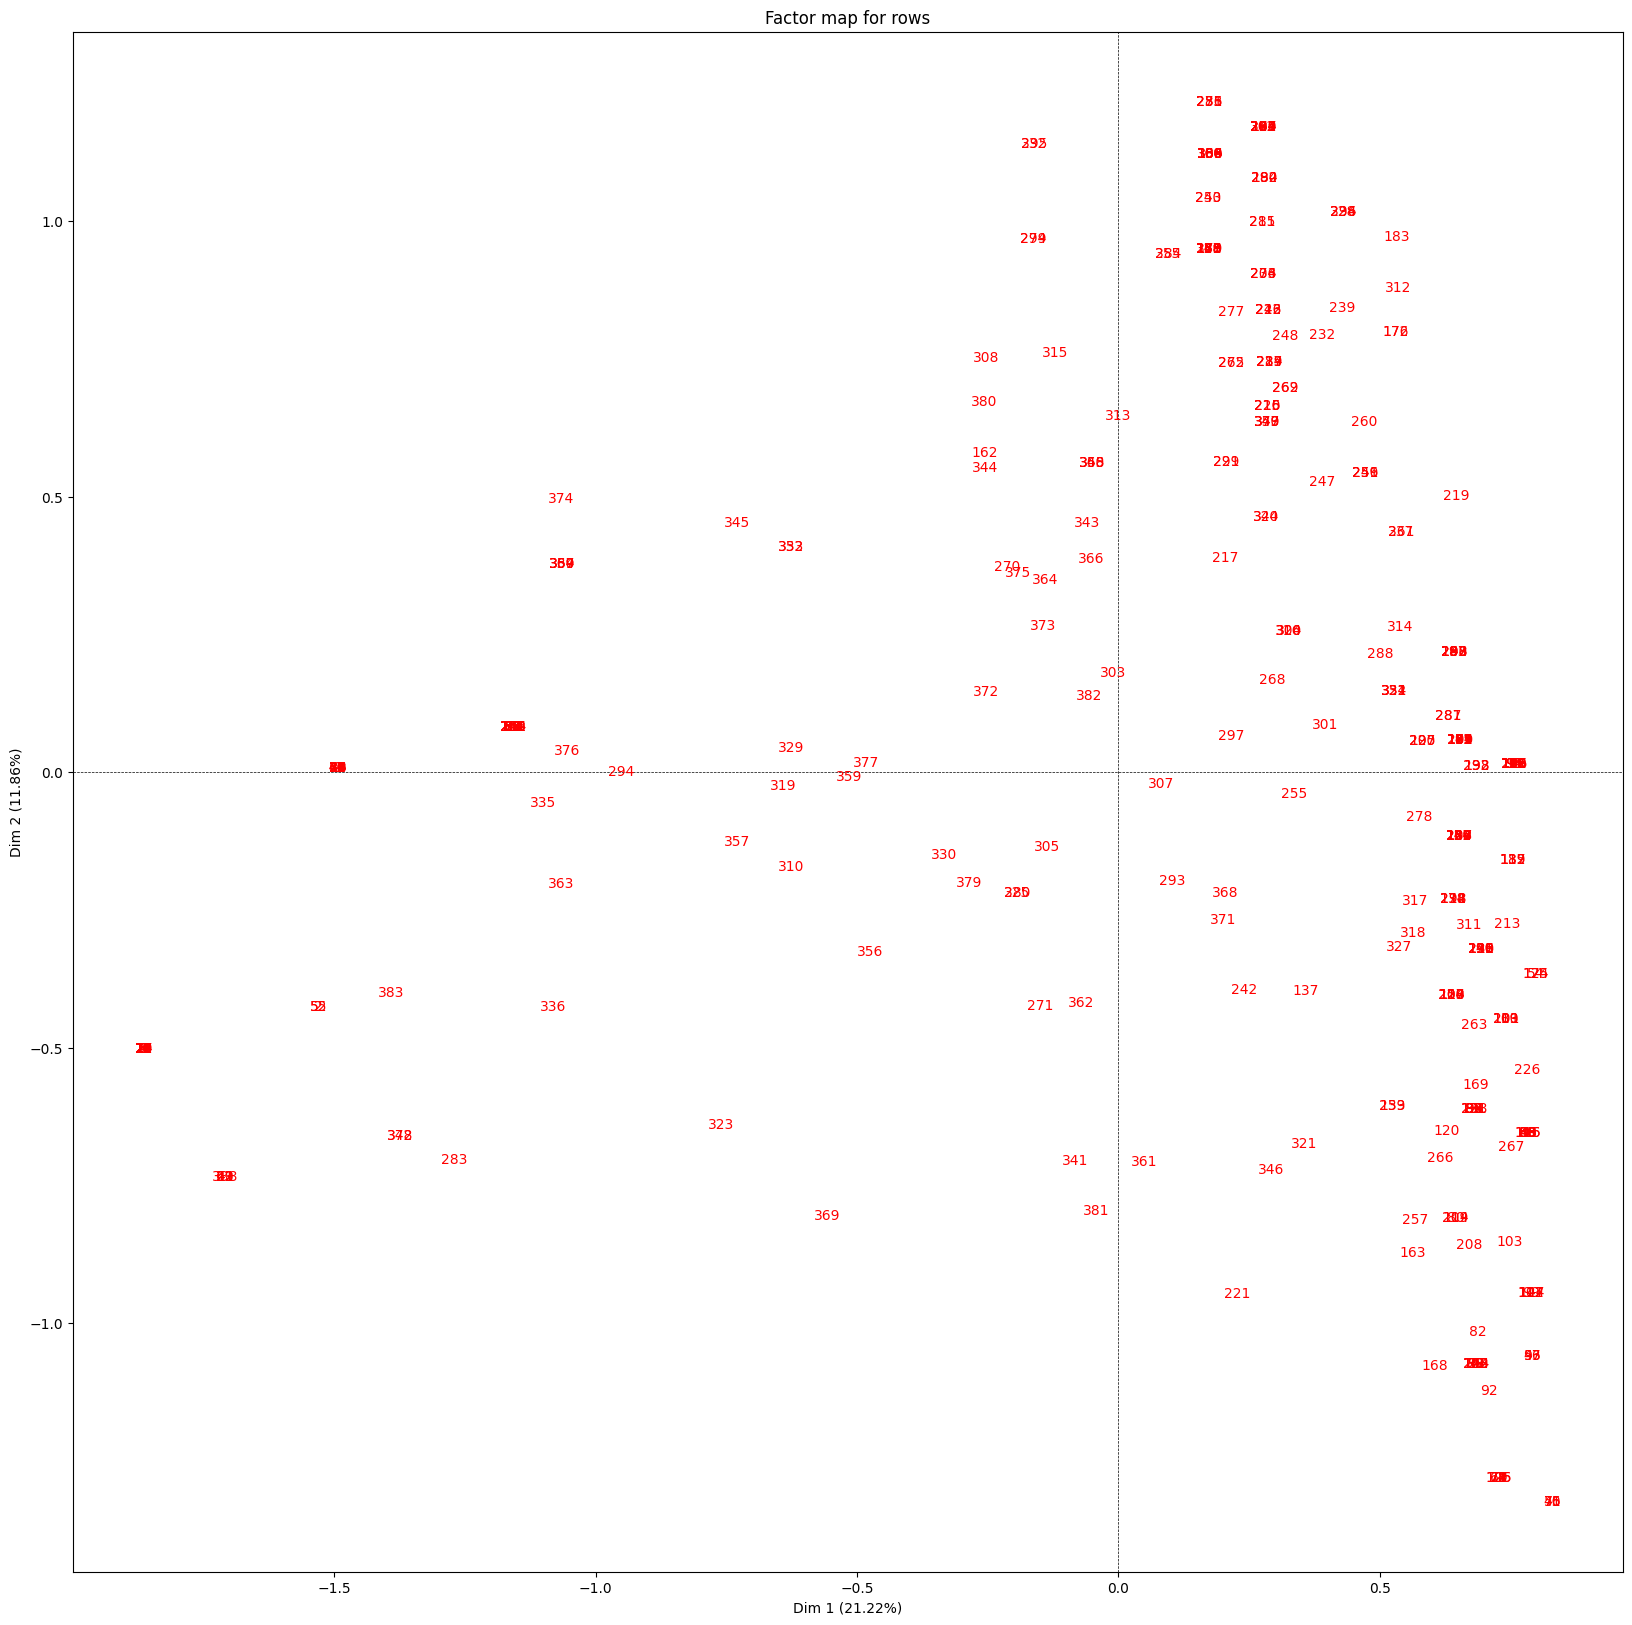

In [40]:
# Représentation graphique simultanée des points lignes
ACM4.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(20,20))

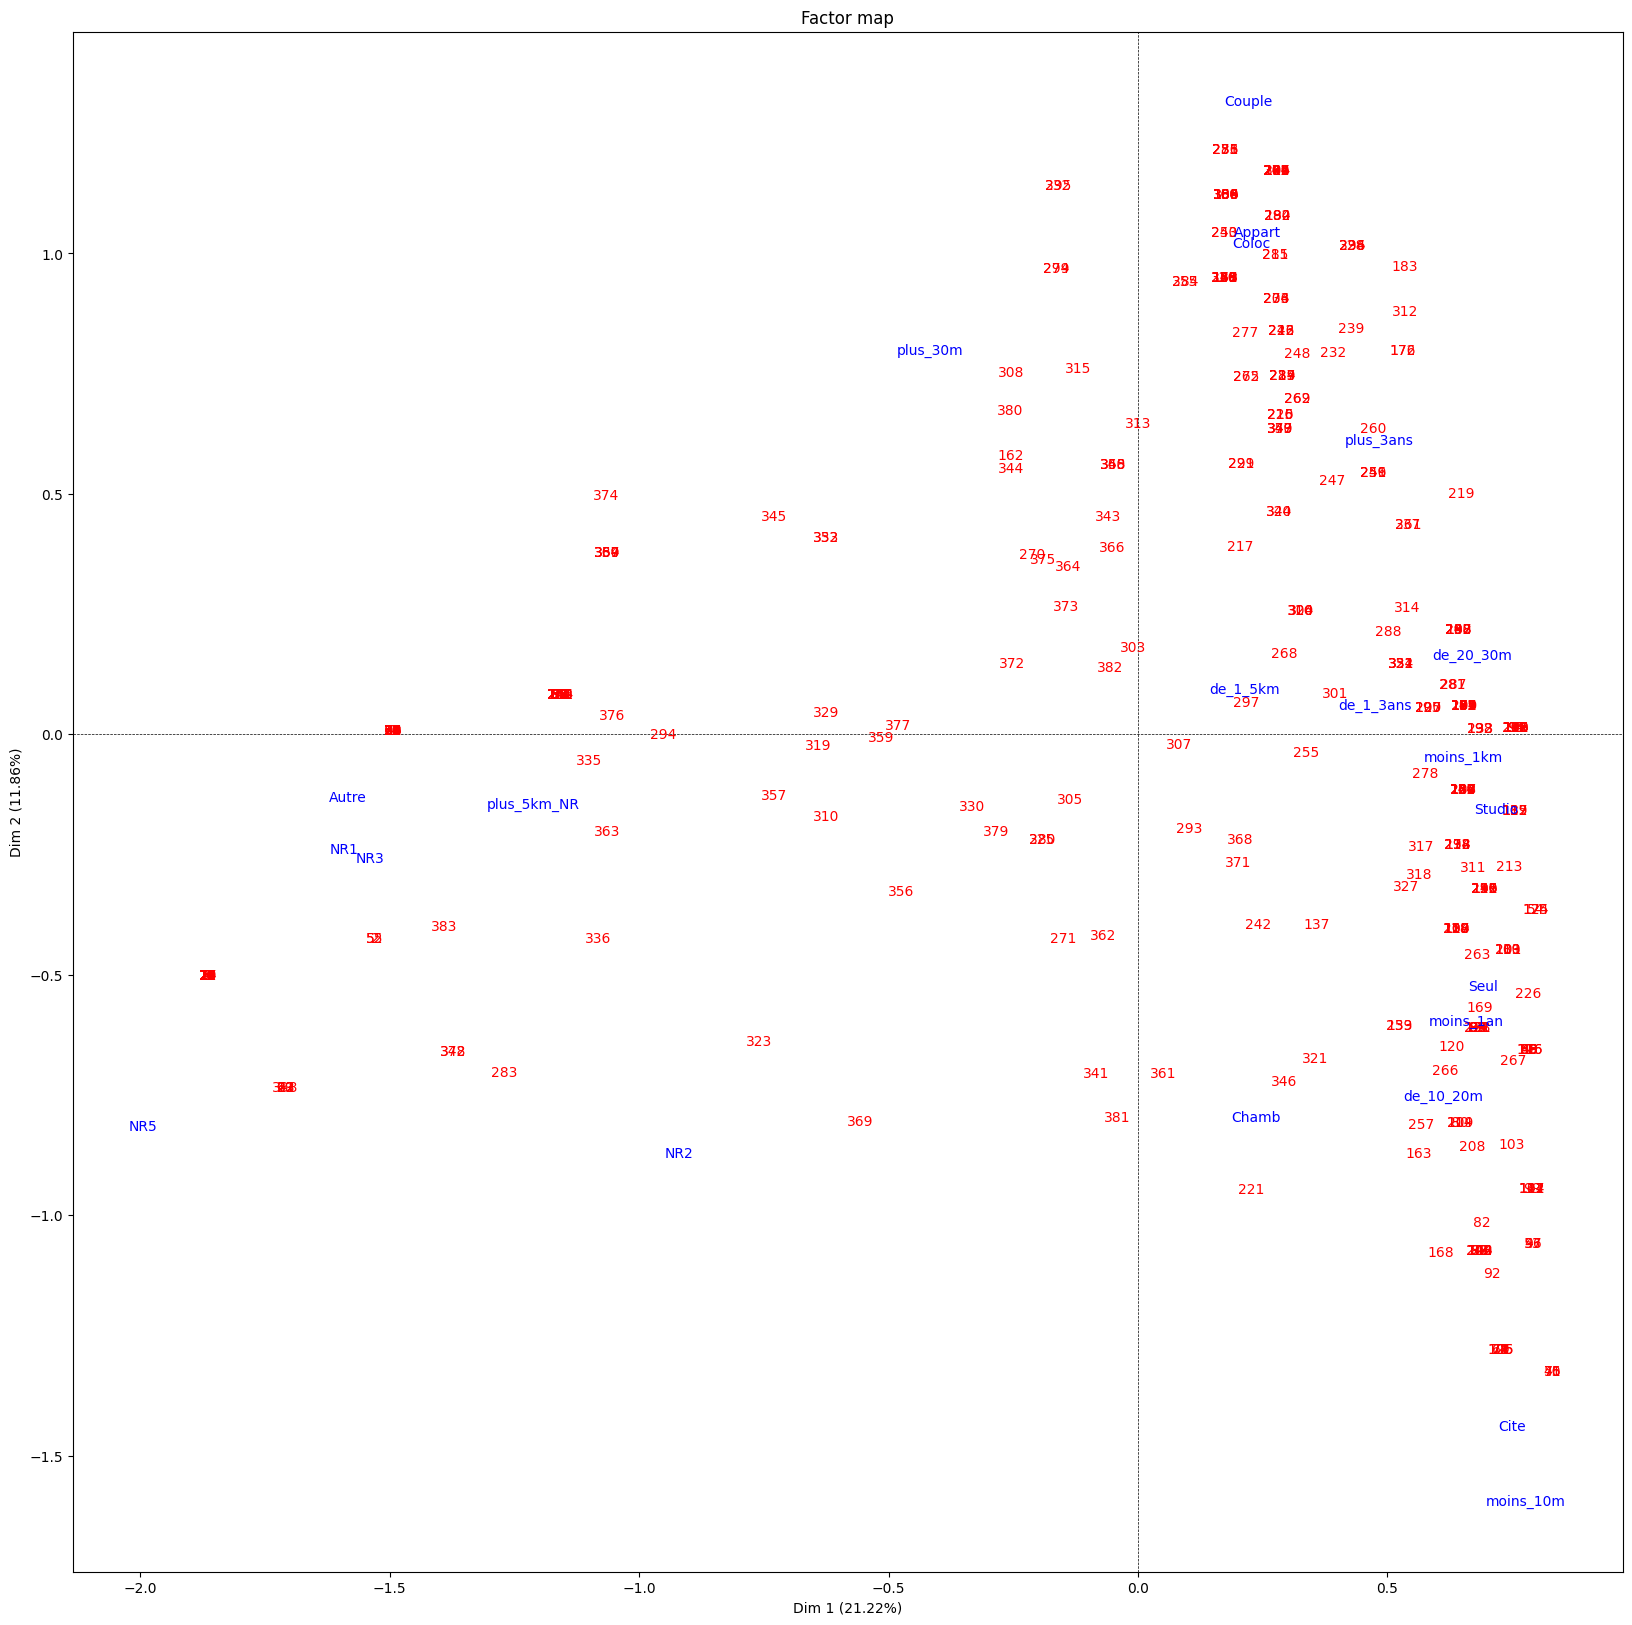

In [41]:
# Représentation graphique simultanée des points lignes
ACM4.mapping(num_x_axis=1, num_y_axis=2,figsize=(20,20))

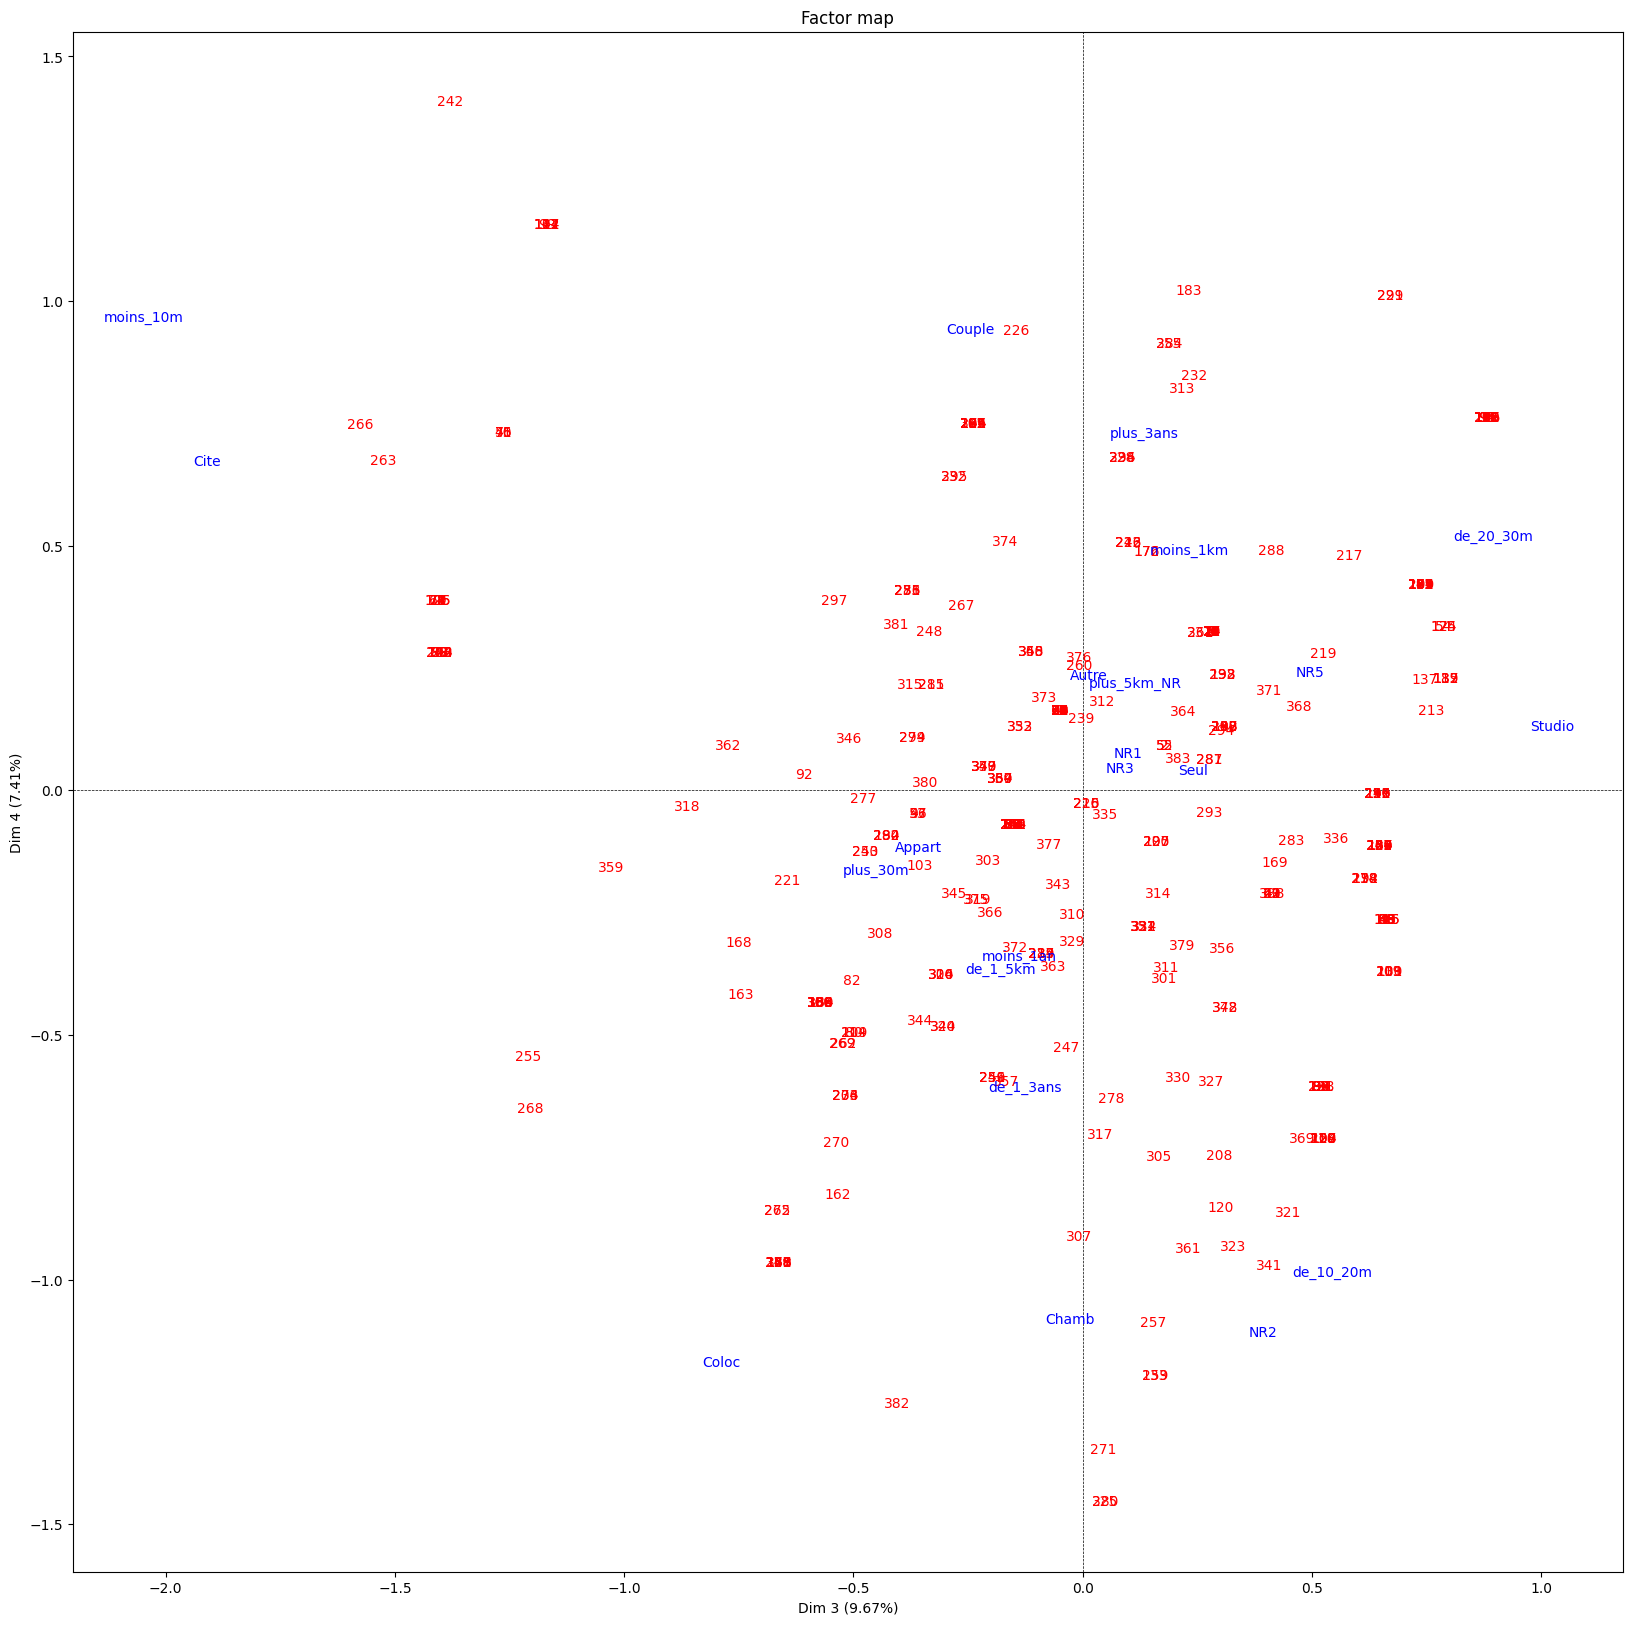

In [42]:
# Représentation graphique simultanée des points lignes
ACM4.mapping(num_x_axis=3, num_y_axis=4,figsize=(20,20))

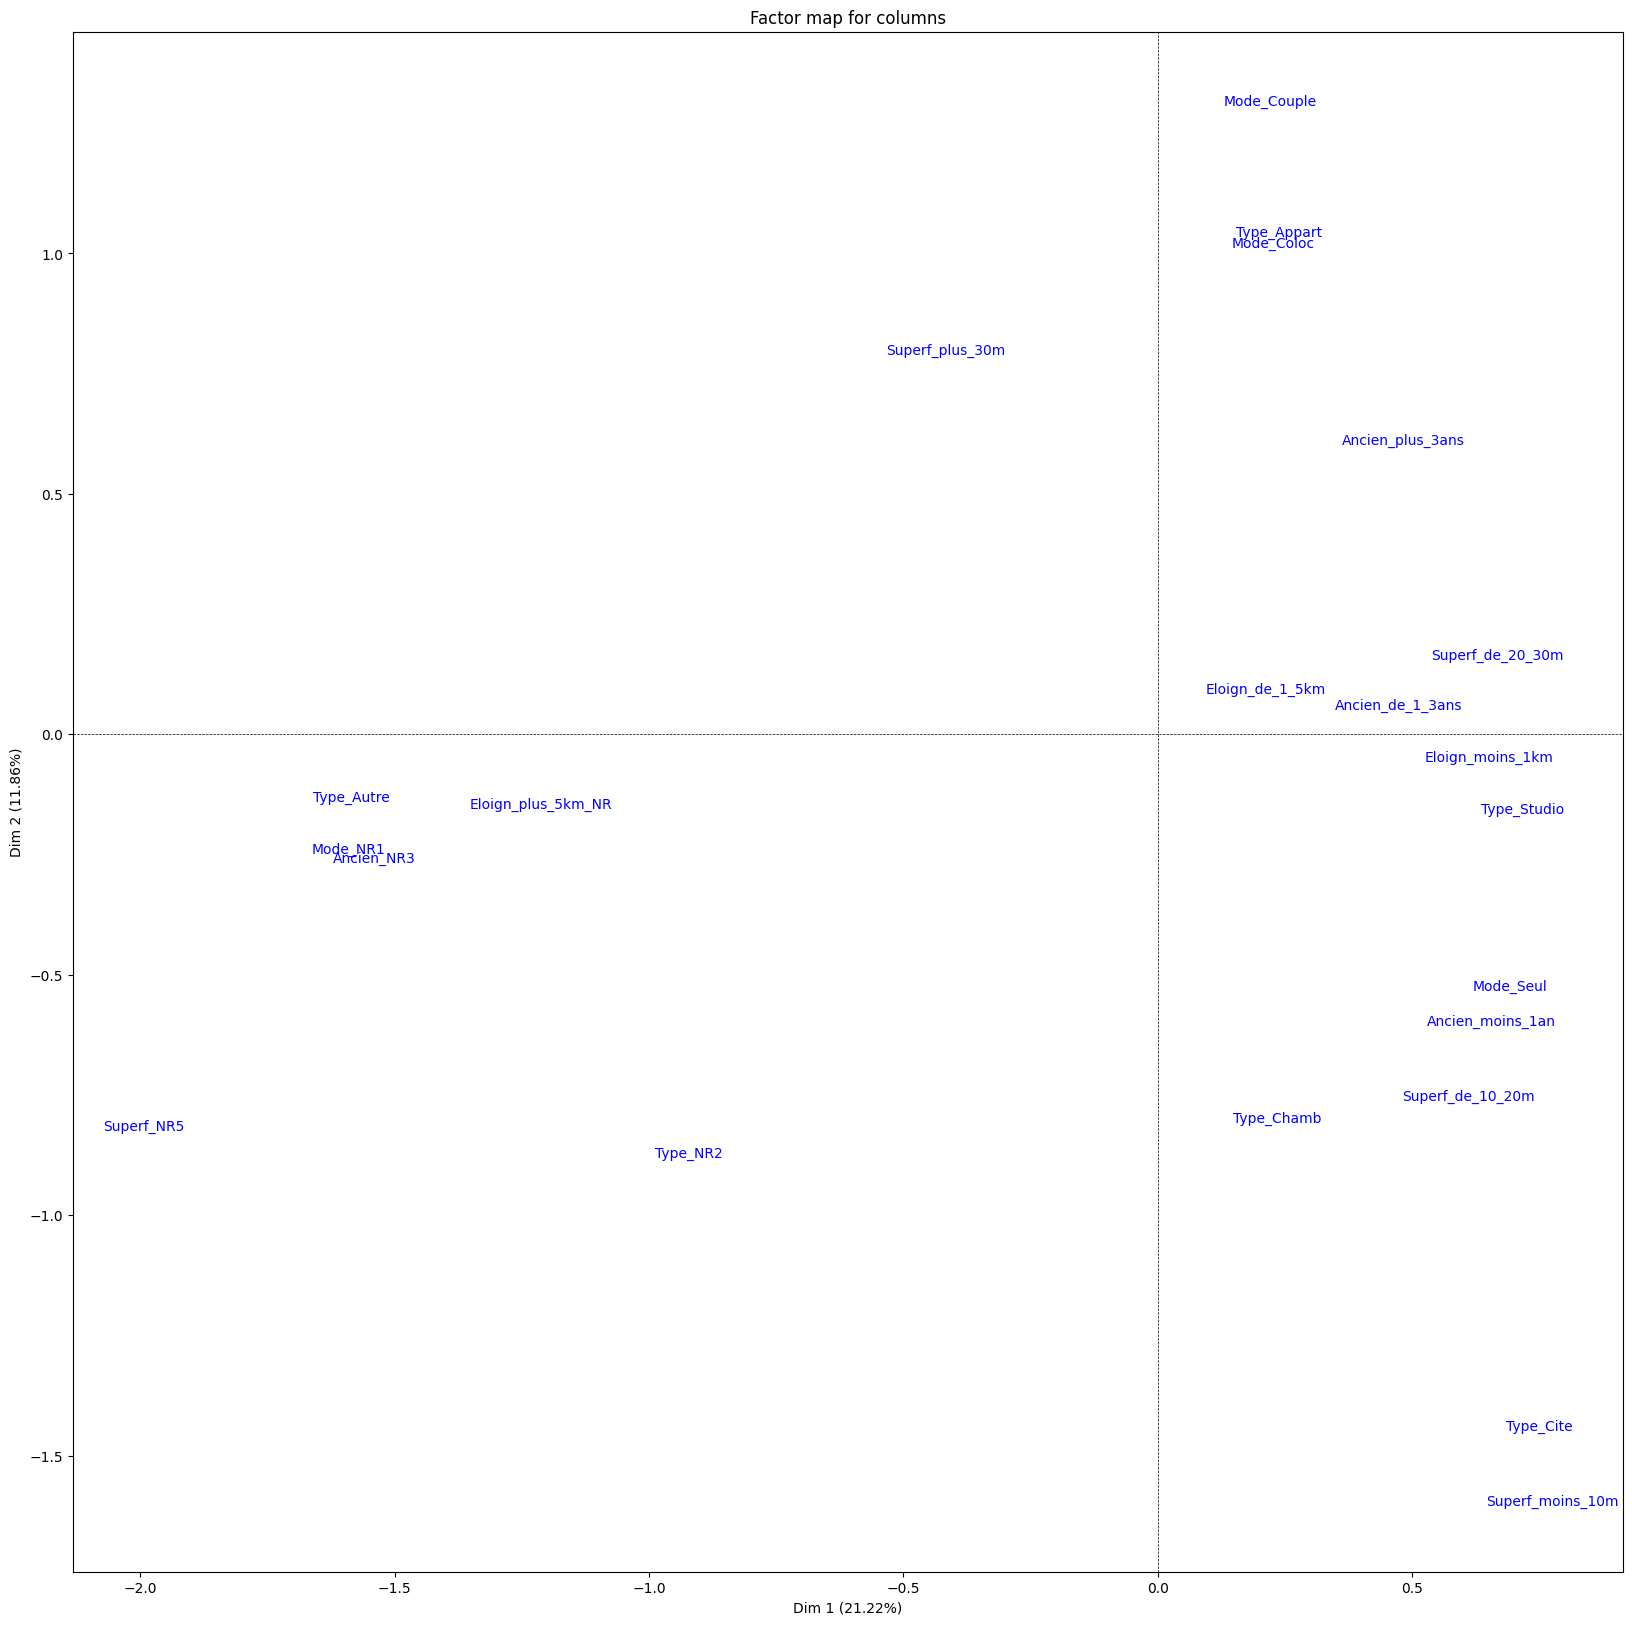

In [43]:
# Représentation graphique des points colonnes
ACM4.mapping_col(num_x_axis=1, num_y_axis=2,short_labels=False,figsize=(20,20))

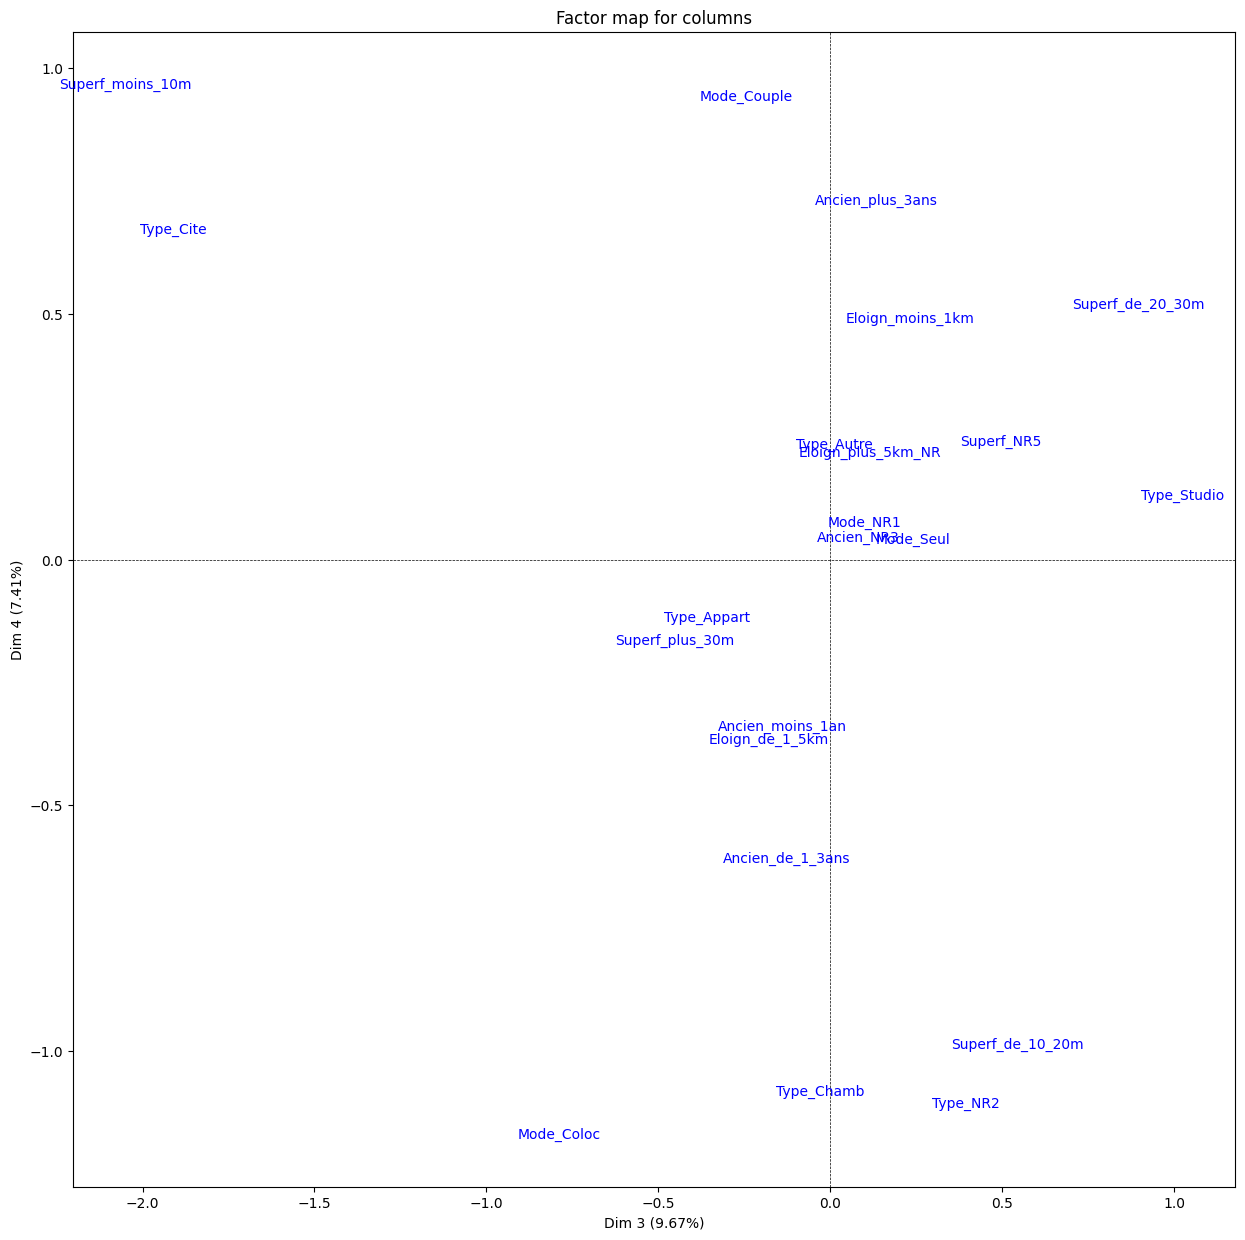

In [44]:
# Représentation graphique des points colonnes
ACM4.mapping_col(num_x_axis=3, num_y_axis=4,short_labels=False,figsize=(15,15))

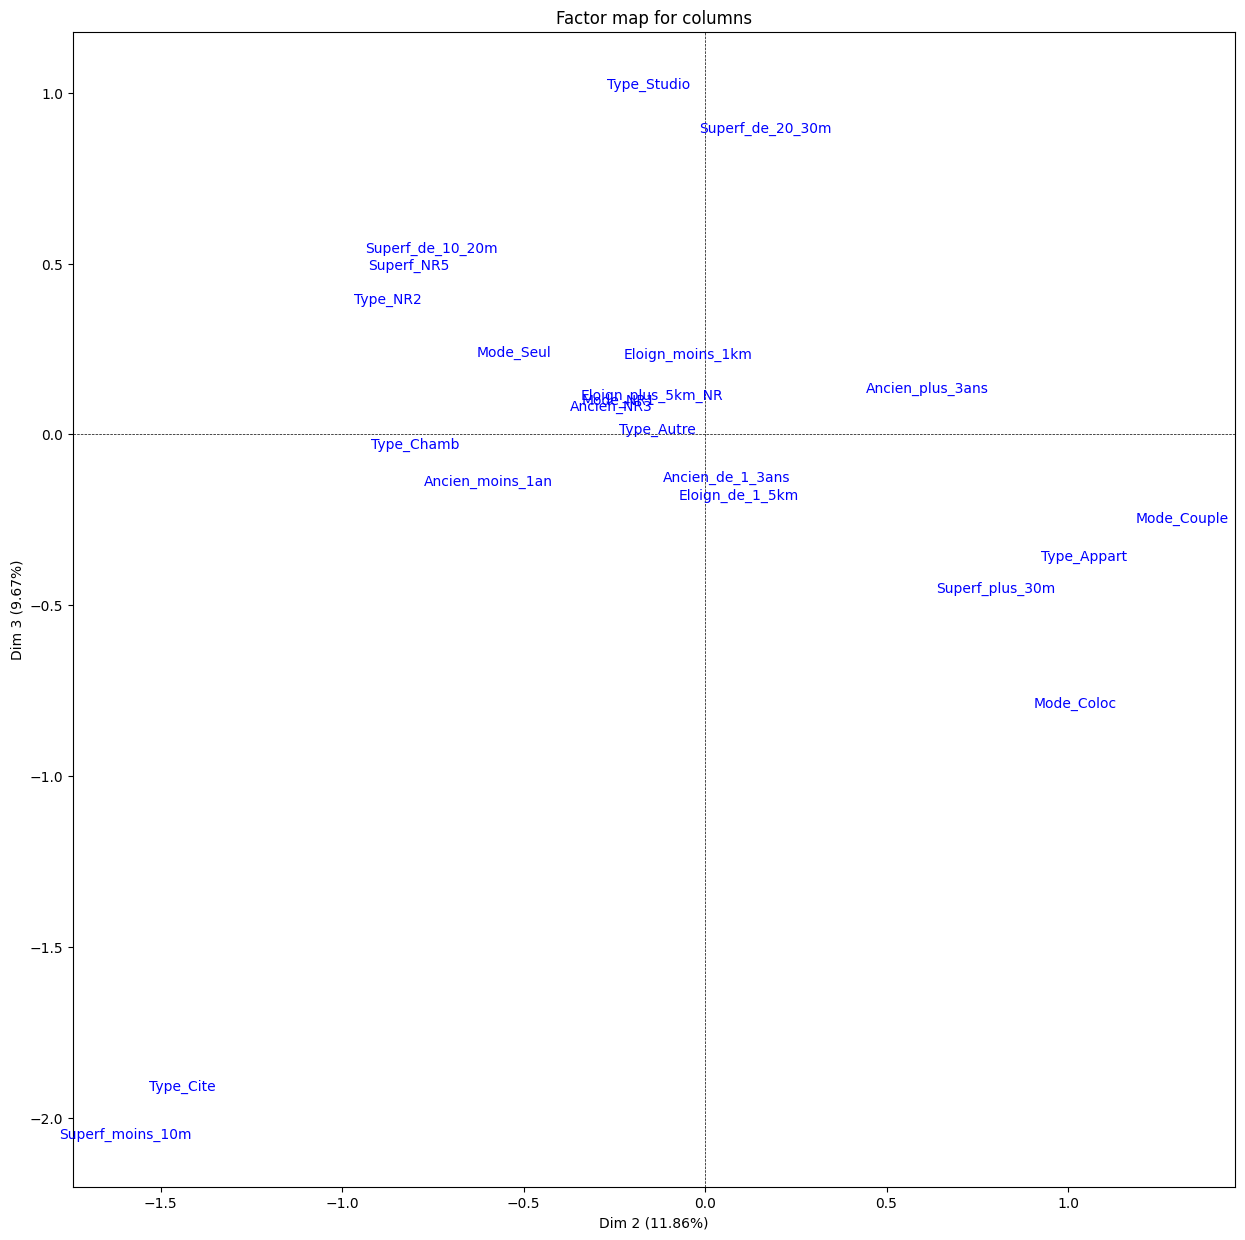

In [53]:
# Représentation graphique des points colonnes
ACM4.mapping_col(num_x_axis=2, num_y_axis=3,short_labels=False,figsize=(15,15))

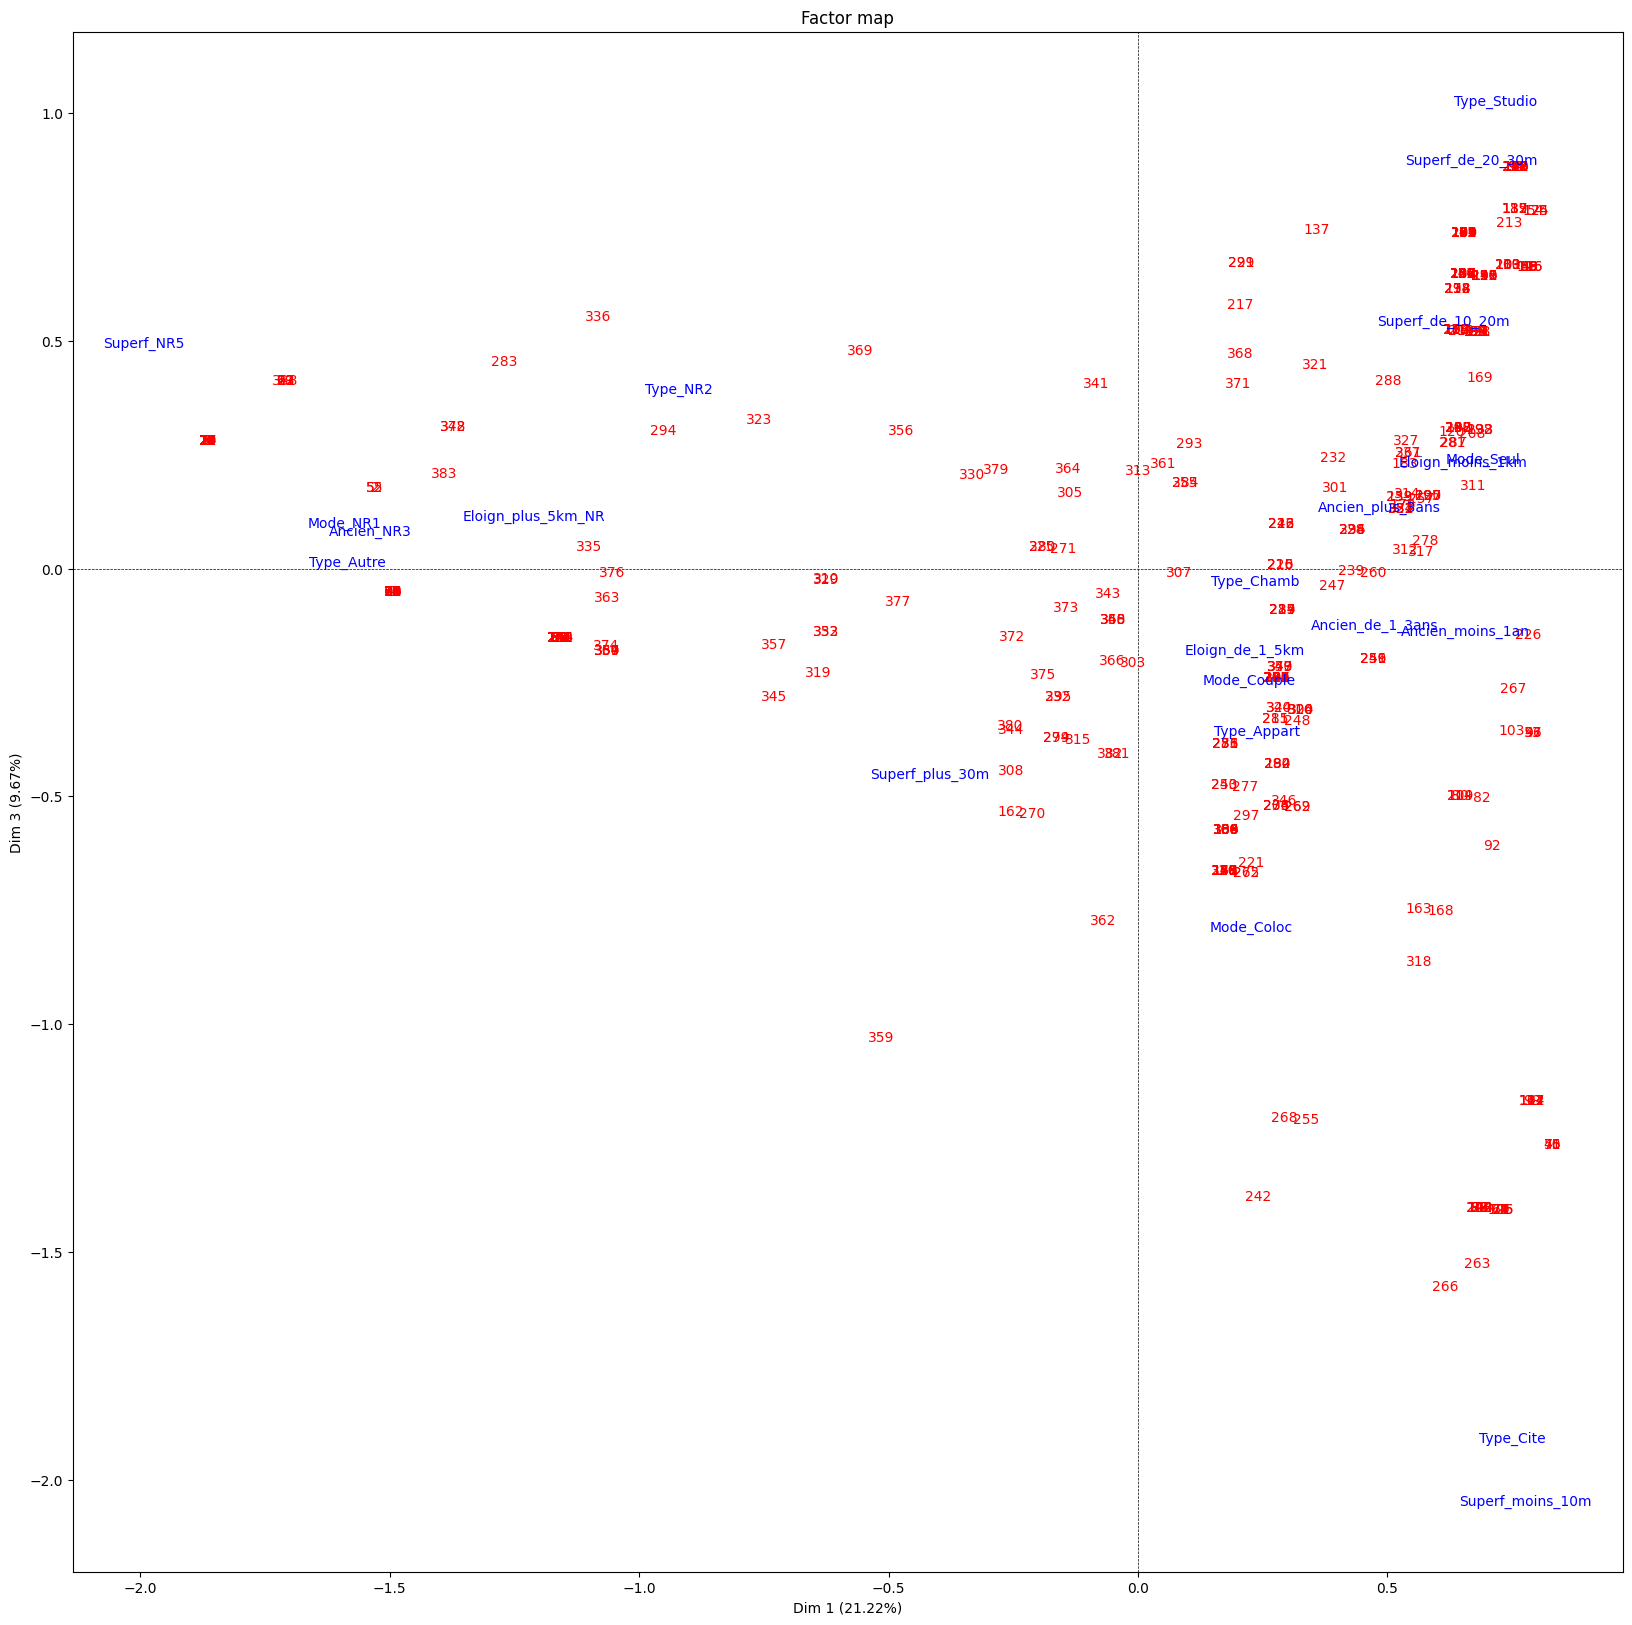

In [45]:
# Il est possible d'afficher le label de la variable à coté du label de sa modalité
ACM4.mapping(num_x_axis=1, num_y_axis=3, short_labels=False,figsize=(20,20))

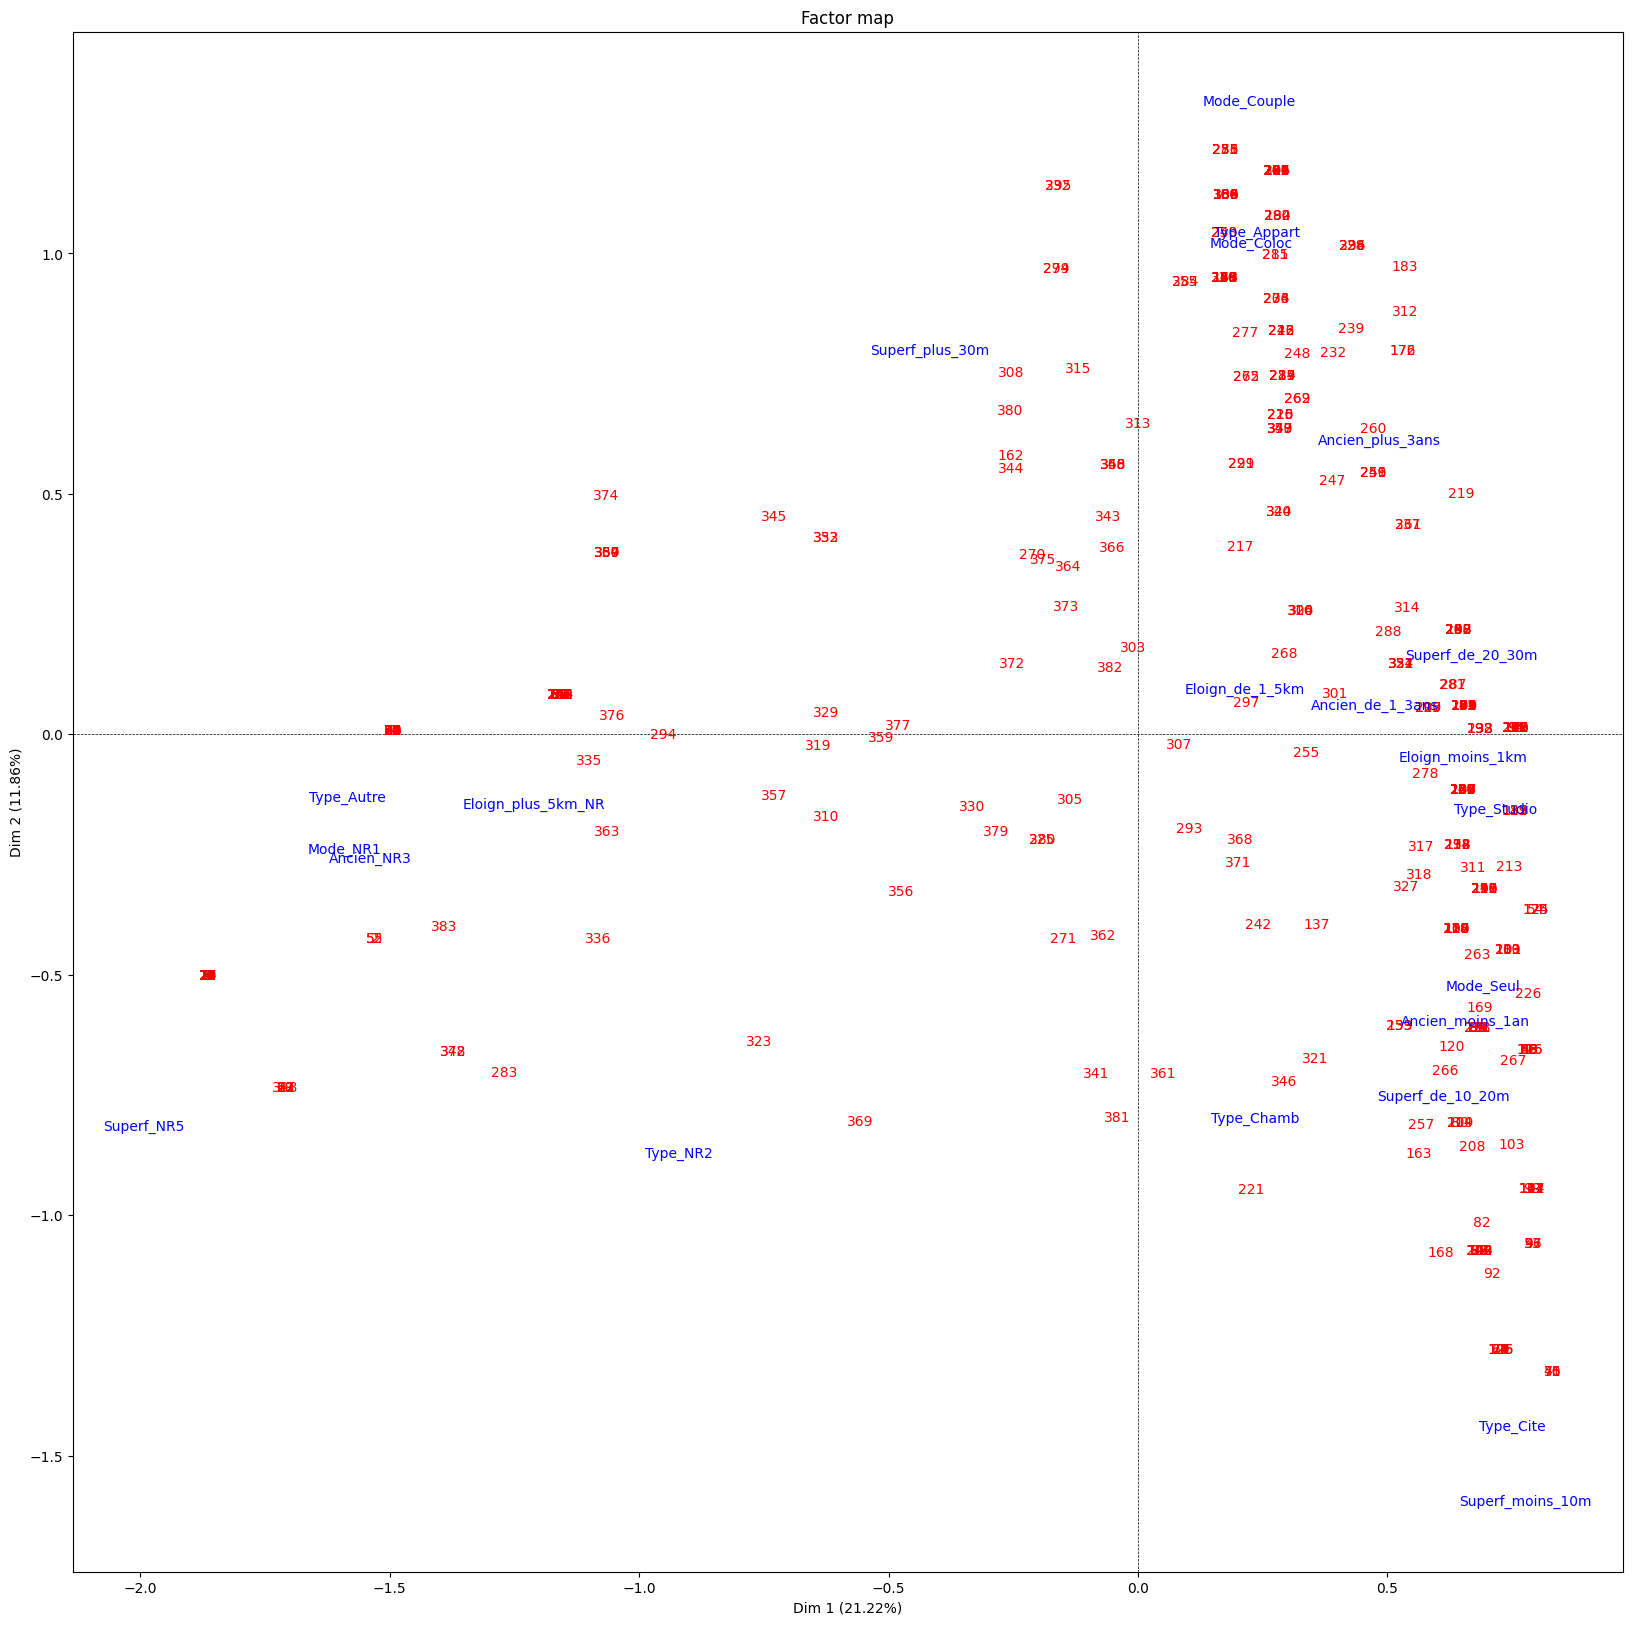

In [46]:
# Il est possible d'afficher le label de la variable à coté du label de sa modalité
ACM4.mapping(num_x_axis=1, num_y_axis=2, short_labels=False,figsize=(20,20))

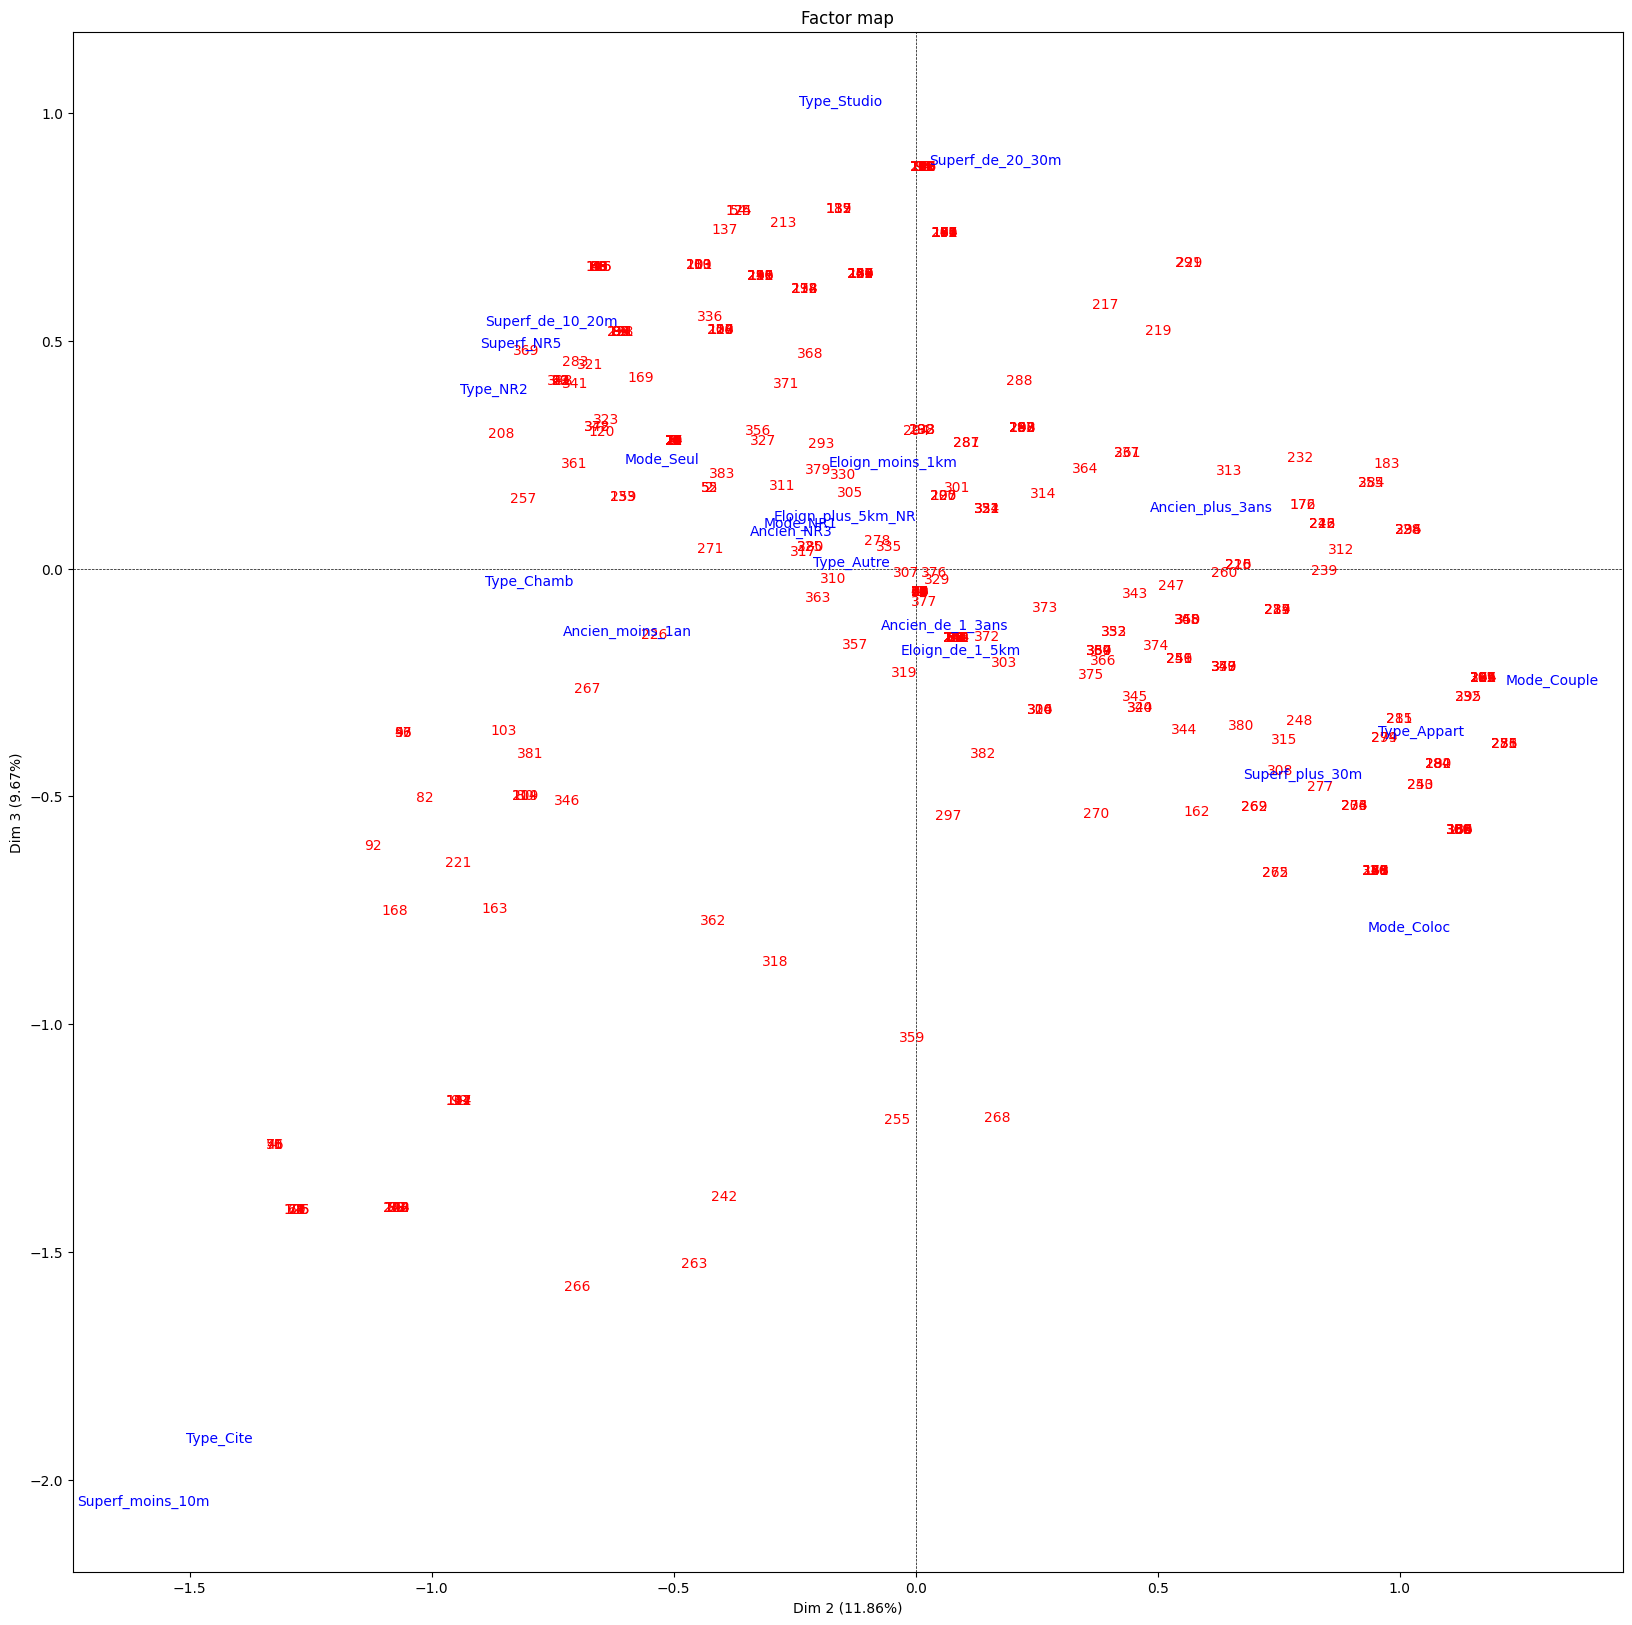

In [58]:
ACM4.mapping(num_x_axis=2, num_y_axis=3, short_labels=False,figsize=(20,20))

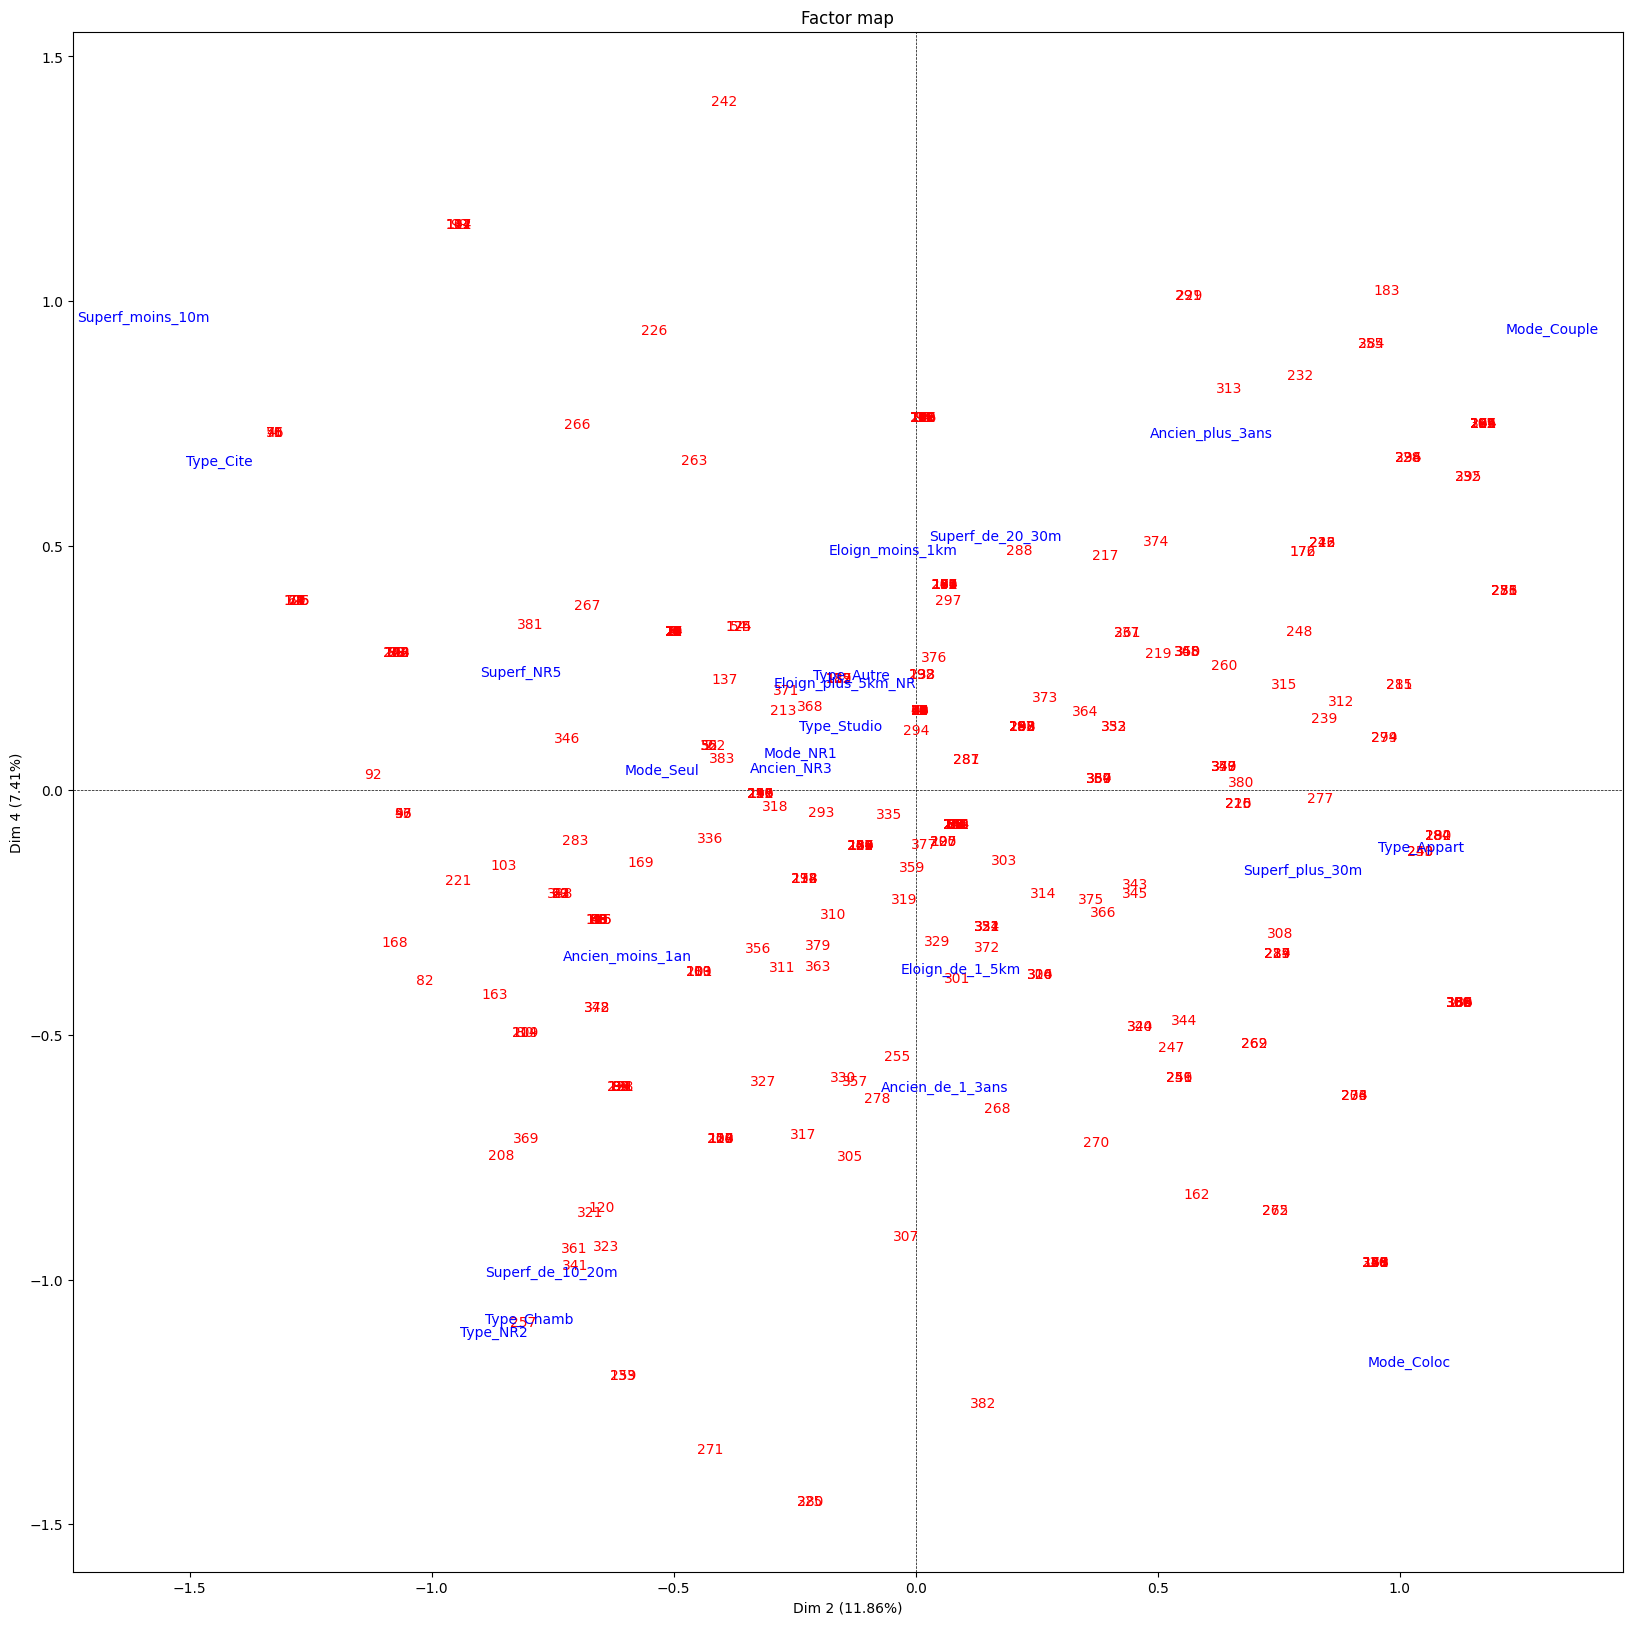

In [59]:
ACM4.mapping(num_x_axis=2, num_y_axis=4, short_labels=False,figsize=(20,20))

## 1.relations aux associations/ressemblances entre les différents individus：
dans le factor map_row:
1. Zone droite (surtout le quatrième quadrant)
La majorité des étudiants se trouve dans la partie droite du graphique. Cela montre qu’ils ont des réponses similaires aux questions sur le logement.
Cette concentration indique un comportement ou une habitude majoritaire, par exemple : vivre hors du campus, avoir un budget limité ou utiliser un même mode de transport (à vérifier avec le graphique des modalités).

2. Zone gauche (premier et troisième quadrants)
Dans la partie gauche, les étudiants sont peu nombreux. Certains (comme les individus 383, 336, 342, 283) sont loin du centre, ce qui montre qu’ils ont des réponses différentes des autres.
Par exemple, ils peuvent avoir choisi un type de logement rare, habiter loin ou utiliser un mode de transport peu courant.

3. Individus proches de l’origine
Les individus proches du centre (comme 329, 294) ont des réponses proches de la moyenne. Ils ne montrent pas de tendance particulière.

#### Conclusion :
Il existe un groupe d’étudiants avec des comportements similaires liés au logement.

Quelques individus sont différents et représentent peut-être des cas particuliers à analyser.

## 2.relations aux associations/ressemblances entre les différents variables et modalités
D’après la qualité de représentation (cos2) et la contribution des variables sur le premier axe, on observe que les modalités NR occupent une part importante, ce qui indique que les autres variables ont une influence plus faible sur la construction de cette dimension.

Donc on utilise le graphique des variables sur les axes 2 et 3, avec le cos²

Analyse des axes 2 et 3 (graphique + cos²)
Axe 2 :Modalités importantes : Appart, Couple, plus_30m, Coloc
Représentent un style de logement confortable, partagé, avec une grande surface.
Axe 3 :
Modalités bien représentées : Cite, moins_10m, Studio, de_20_30m
Montre une opposition entre les logements très petits (ex : cité U) et les studios plus confortables.

#### Conclusion :
L’axe 2 montre une opposition entre logement partagé/confortable et logement plus petit/individuel.
L’axe 3 distingue surtout les logements très étudiants (ex : Cité) des logements un peu plus grands et isolés.
Les modalités les plus fiables pour interpréter ces axes sont Appart, Studio, Cite, plus_30m, moins_10m.

## 3.les potentielles tendances
Grâce à l’analyse des axes 2, 3 et 4 de l’ACM, combinée aux cartes des modalités et aux valeurs cos², trois grandes tendances de comportement résidentiel des étudiants émergent :

Tendance 1 : Évolution des conditions de logement (Axe 2)
Modalités clés : Appart, Coloc, Couple, plus_30m, Cite, moins_10m
Lecture : du logement basique (cité U, petite surface) vers un habitat plus confortable (appartement, colocation, grande surface)
Indique une différenciation selon le niveau de confort et la capacité financière

Tendance 2 : Parcours résidentiel étudiant (Axe 3)
Modalités clés : Cite, moins_10m, Studio, de_20_30m
Lecture : passage de l’hébergement temporaire (début d’études) à des logements plus individualisés
Montre l’évolution de la situation personnelle (du court séjour vers le logement semi-indépendant)

Tendance 3 : Stabilité résidentielle et forme sociale (Axe 4)
Modalités clés : Coloc, plus_3ans, Couple, de_10_20m
Lecture : opposition entre profils stables (longue durée, colocation ou couple) et profils temporaires (court séjour, chambre en résidence)
Révèle des styles de vie distincts dans le logement étudiant

#### Conclusion :
On distingue trois grands profils d’étudiants :

Les étudiants en début de parcours : logements étudiants, courts séjours, surfaces faibles

Les étudiants en transition : studio, surface moyenne, autonomie croissante

Les étudiants stabilisés : logement en couple ou colocation, longue durée, confort élevé